# Q1_2

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
import itertools
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

plt.style.use("default") 



In [5]:
# import parquet file 
df =pd.read_parquet('data/set-a_no_nan.parquet', engine='pyarrow')

In [6]:
static_variables = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']
if 'ICUType' in df.columns:
    static_variables.remove('ICUType')
static_variables_we_want = ['Age', 'Gender', 'Height', 'Weight']
all_variables = ['Weight', 'Age', 'TroponinI', 'DiasABP', 'MechVent', 'HCO3', 'Cholesterol', 'HCT', 'SaO2', 'WBC', 'SysABP', 'Urine', 'ICUType', 'Gender', 'ALP', 'Creatinine', 'K', 'AST', 'Glucose', 'RespRate', 'MAP', 'FiO2', 'BUN', 'Na', 'Bilirubin', 'TroponinT', 'PaCO2', 'Height', 'GCS', 'HR', 'pH', 'PaO2', 'Lactate', 'ALT', 'NISysABP', 'RecordID', 'Platelets', 'Temp', 'Mg', 'NIDiasABP', 'Albumin', 'NIMAP']
dyn_variables = [x for x in all_variables if x not in static_variables]
dyn_variables.append('Weight_VAR')
len(dyn_variables), len(static_variables_we_want)

(37, 4)

In [7]:
static_df = df[static_variables_we_want+['RecordID']].drop_duplicates().reset_index(drop=True)
static_df

Parameter   Age  Gender  Height  Weight  RecordID
0          54.0     0.0   170.2    78.6  132539.0
1          76.0     1.0   175.3    76.0  132540.0
2          76.0     1.0   175.3    76.0  132540.0
3          44.0     0.0   170.2    56.7  132541.0
4          44.0     0.0   170.2    56.7  132541.0
...         ...     ...     ...     ...       ...
4938       25.0     1.0   170.2   166.4  142667.0
4939       44.0     1.0   170.2   109.0  142670.0
4940       37.0     1.0   170.2    87.4  142671.0
4941       37.0     1.0   170.2    87.4  142671.0
4942       78.0     0.0   157.5    70.7  142673.0

[4943 rows x 5 columns]

In [9]:
#  open outcomes.csv file
outcomes = pd.read_csv('data/Outcomes-a.txt')
outcomes

RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
0       132539       6     1               5        -1                  0
1       132540      16     8               8        -1                  0
2       132541      21    11              19        -1                  0
3       132543       7     1               9       575                  0
4       132545      17     2               4       918                  0
...        ...     ...   ...             ...       ...                ...
3995    142665      19     7              10       336                  0
3996    142667       8     2               3        -1                  0
3997    142670       8     5              11        -1                  0
3998    142671      22    10               8         7                  1
3999    142673      25    11               7        -1                  0

[4000 rows x 6 columns]

In [10]:
static_df = static_df.merge(outcomes, on='RecordID', how='left')
static_df

Age  Gender  Height  Weight  RecordID  SAPS-I  SOFA  Length_of_stay  \
0     54.0     0.0   170.2    78.6  132539.0       6     1               5   
1     76.0     1.0   175.3    76.0  132540.0      16     8               8   
2     76.0     1.0   175.3    76.0  132540.0      16     8               8   
3     44.0     0.0   170.2    56.7  132541.0      21    11              19   
4     44.0     0.0   170.2    56.7  132541.0      21    11              19   
...    ...     ...     ...     ...       ...     ...   ...             ...   
4938  25.0     1.0   170.2   166.4  142667.0       8     2               3   
4939  44.0     1.0   170.2   109.0  142670.0       8     5              11   
4940  37.0     1.0   170.2    87.4  142671.0      22    10               8   
4941  37.0     1.0   170.2    87.4  142671.0      22    10               8   
4942  78.0     0.0   157.5    70.7  142673.0      25    11               7   

      Survival  In-hospital_death  
0           -1                  0  
1           -1                  0  
2           -1                  0  
3           -1                  0  
4           -1                  0  
...        ...                ...  
4938        -1                  0  
4939        -1                  0  
4940         7                  1  
4941         7                  1  
4942        -1                  0  

[4943 rows x 10 columns]

Text(0.5, 1.0, 'In-hospital_death distribution')

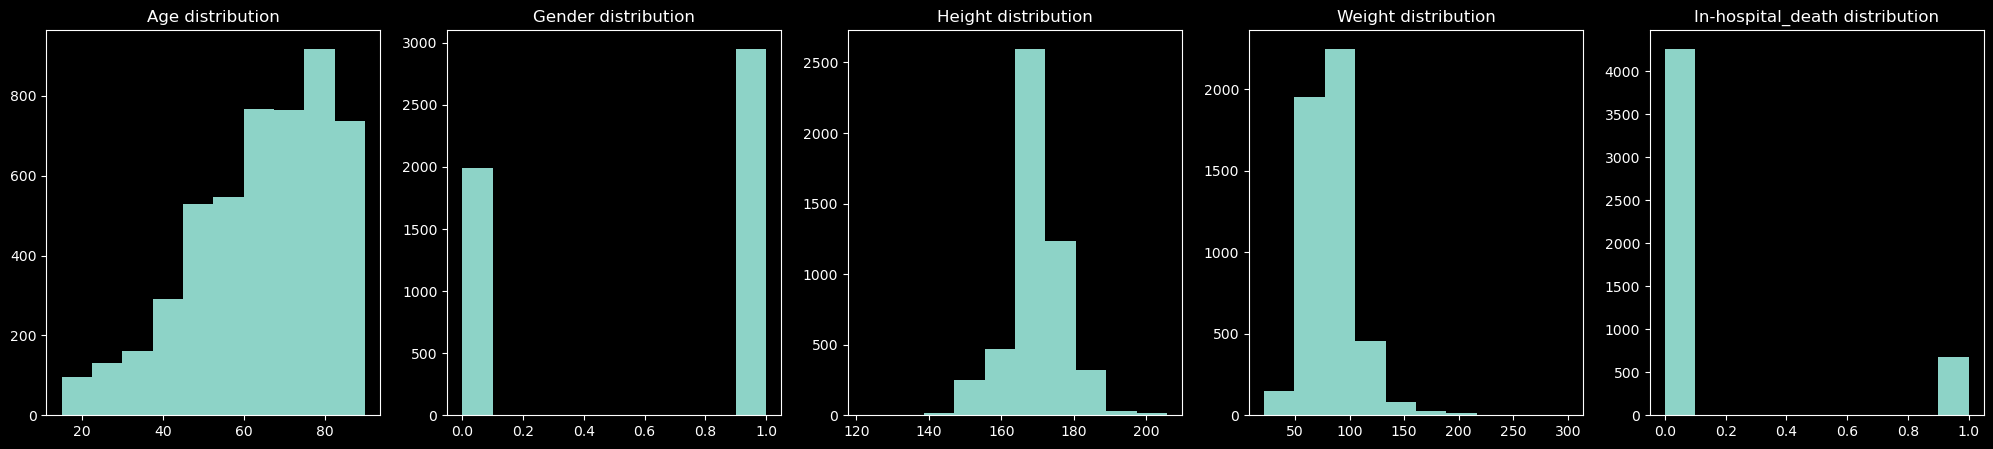

In [11]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.hist(static_df['Age'])
plt.title('Age distribution')

plt.subplot(1,5,2)
plt.hist(static_df['Gender'])
plt.title('Gender distribution')

plt.subplot(1,5,3)
plt.hist(static_df['Height'])
plt.title('Height distribution')

plt.subplot(1,5,4)
plt.hist(static_df['Weight'])
plt.title('Weight distribution')

plt.subplot(1,5,5)
plt.hist(static_df['In-hospital_death'])
plt.title('In-hospital_death distribution')

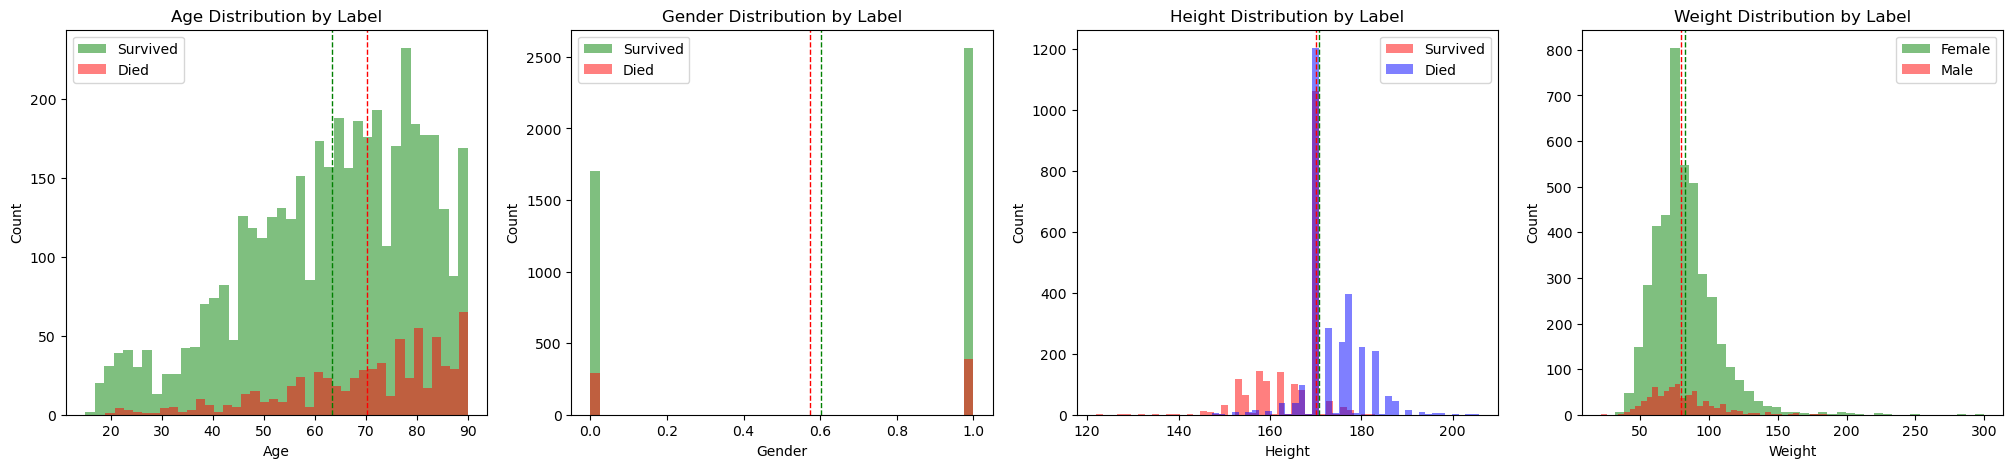

In [22]:
plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Age'], bins=40, alpha=0.5, color='green', label="Survived")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Age'], bins=40, alpha=0.5, color='red', label="Died")

# add vertical line for mean for each group
plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Age'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Age'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Age Distribution by Label')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,4,2)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Gender'], bins=40, alpha=0.5, color='green', label="Survived")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Gender'], bins=40, alpha=0.5, color='red', label="Died")

plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Gender'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Gender'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title('Gender Distribution by Label')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,4,3)
plt.hist(static_df[static_df['Gender'] == 0]['Height'], bins=40, alpha=0.5, color='red', label="Survived")
plt.hist(static_df[static_df['Gender'] == 1]['Height'], bins=40, alpha=0.5, color='blue', label="Died")

plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Height'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Height'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title('Height Distribution by Label')
plt.xlabel('Height')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,4,4)
plt.hist(static_df[static_df['In-hospital_death'] == 0]['Weight'], bins=40, alpha=0.5, color='green', label="Female")
plt.hist(static_df[static_df['In-hospital_death'] == 1]['Weight'], bins=40, alpha=0.5, color='red', label="Male")

plt.axvline(static_df[static_df['In-hospital_death'] == 0]['Weight'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(static_df[static_df['In-hospital_death'] == 1]['Weight'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title('Weight Distribution by Label')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend()




In [13]:
dyn_df = df[['RecordID'] + dyn_variables]
dyn_df

dyn_df = dyn_df.merge(outcomes, on='RecordID', how='left')



In [14]:
dyn_df

RecordID  TroponinI  DiasABP  MechVent  HCO3  Cholesterol   HCT  SaO2  \
0       132539.0        2.6     58.0       1.0  23.0        152.0  30.3  97.0   
1       132539.0        2.6     58.0       1.0  23.0        152.0  30.3  97.0   
2       132539.0        2.6     58.0       1.0  23.0        152.0  30.3  97.0   
3       132539.0        2.6     58.0       1.0  23.0        152.0  30.3  97.0   
4       132539.0        2.6     58.0       1.0  23.0        152.0  33.7  97.0   
...          ...        ...      ...       ...   ...          ...   ...   ...   
195995  142673.0        2.6     52.0       1.0  19.0        152.0  30.7  98.0   
195996  142673.0        2.6     49.0       1.0  19.0        152.0  30.7  98.0   
195997  142673.0        2.6     50.0       1.0  19.0        152.0  30.7  98.0   
195998  142673.0        2.6     54.0       1.0  19.0        152.0  30.7  98.0   
195999  142673.0        2.6     58.0       1.0  19.0        152.0  30.7  98.0   

         WBC  SysABP  ...   Mg  NIDiasABP  Albumin      NIMAP  Weight_VAR  \
0       11.4   117.0  ...  2.0       57.0      2.9  75.334167        81.0   
1       11.4   117.0  ...  2.0       61.5      2.9  91.665000        81.0   
2       11.4   117.0  ...  2.0       62.0      2.9  87.000000        81.0   
3       11.4   117.0  ...  2.0       52.0      2.9  75.670000        81.0   
4       11.4   117.0  ...  2.0       52.0      2.9  72.670000        81.0   
...      ...     ...  ...  ...        ...      ...        ...         ...   
195995  11.0   112.0  ...  2.1       87.0      2.2  90.000000        87.3   
195996  11.0   110.0  ...  2.1       55.0      2.2  63.000000        87.3   
195997  11.0   112.0  ...  2.1       82.0      2.2  92.000000        87.3   
195998  11.0   121.0  ...  2.1       67.0      2.2  83.000000        87.3   
195999  11.0   128.0  ...  2.1       66.0      2.2  82.000000        87.3   

        SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death  
0            6     1               5        -1                  0  
1            6     1               5        -1                  0  
2            6     1               5        -1                  0  
3            6     1               5        -1                  0  
4            6     1               5        -1                  0  
...        ...   ...             ...       ...                ...  
195995      25    11               7        -1                  0  
195996      25    11               7        -1                  0  
195997      25    11               7        -1                  0  
195998      25    11               7        -1                  0  
195999      25    11               7        -1                  0  

[196000 rows x 43 columns]

In [15]:
# group by RecordID and calculate the mean of each variable
mean_dyn_df = dyn_df.groupby('RecordID').mean().reset_index()
mean_dyn_df

RecordID  TroponinI    DiasABP  MechVent       HCO3  Cholesterol  \
0     132539.0        2.6  58.000000       1.0  25.938776   152.000000   
1     132540.0        2.6  58.125850       1.0  22.102041   152.000000   
2     132541.0        2.6  60.959184       1.0  25.163265   152.000000   
3     132543.0        2.6  58.000000       1.0  27.408163   152.000000   
4     132545.0        2.6  58.000000       1.0  19.306122   152.000000   
...        ...        ...        ...       ...        ...          ...   
3995  142665.0        2.6  68.731293       1.0  21.653061   152.000000   
3996  142667.0        2.6  58.000000       1.0  23.918367   127.714286   
3997  142670.0        2.6  59.153061       1.0  24.244898   152.000000   
3998  142671.0        2.6  92.591837       1.0  25.183673   152.000000   
3999  142673.0        2.6  55.796599       1.0  19.938776   152.000000   

            HCT       SaO2        WBC      SysABP  ...        Mg  NIDiasABP  \
0     32.287755  97.000000  10.693878  117.000000  ...  1.734694  49.316327   
1     29.328571  96.673469  11.546939  115.557823  ...  2.240816  56.761905   
2     28.387755  95.653061   4.606122  119.908163  ...  1.706122  79.962585   
3     36.867347  97.000000   9.000000  117.000000  ...  2.032653  63.352041   
4     29.244898  97.000000   5.077551  117.000000  ...  1.595918  47.948980   
...         ...        ...        ...         ...  ...       ...        ...   
3995  29.002041  97.000000  13.936735  117.000000  ...  1.577551  68.551020   
3996  31.355102  97.000000   5.408163  117.000000  ...  1.510204  62.591837   
3997  37.100000  97.000000  11.171429  117.459184  ...  2.371429  59.188776   
3998  28.248980  97.000000  12.540816  167.301020  ...  2.893878  57.000000   
3999  34.057143  97.540816  10.222449  109.121088  ...  2.259184  57.979592   

       Albumin      NIMAP  Weight_VAR  SAPS-I  SOFA  Length_of_stay  Survival  \
0     2.900000  70.490187   81.000000     6.0   1.0             5.0      -1.0   
1     2.900000  74.162653   78.865306    16.0   8.0             8.0      -1.0   
2     2.430612  98.160323   56.700000    21.0  11.0            19.0      -1.0   
3     4.369388  82.294957   84.600000     7.0   1.0             9.0     575.0   
4     3.038776  76.036888   81.000000    17.0   2.0             4.0     918.0   
...        ...        ...         ...     ...   ...             ...       ...   
3995  2.900000  84.870782   87.000000    19.0   7.0            10.0     336.0   
3996  2.900000  85.666293  166.400000     8.0   2.0             3.0      -1.0   
3997  2.900000  78.661548  109.000000     8.0   5.0            11.0      -1.0   
3998  3.095918  75.334167   87.400000    22.0  10.0             8.0       7.0   
3999  2.628571  74.789711   80.797959    25.0  11.0             7.0      -1.0   

      In-hospital_death  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
3995                0.0  
3996                0.0  
3997                0.0  
3998                1.0  
3999                0.0  

[4000 rows x 43 columns]

## Mean distribution

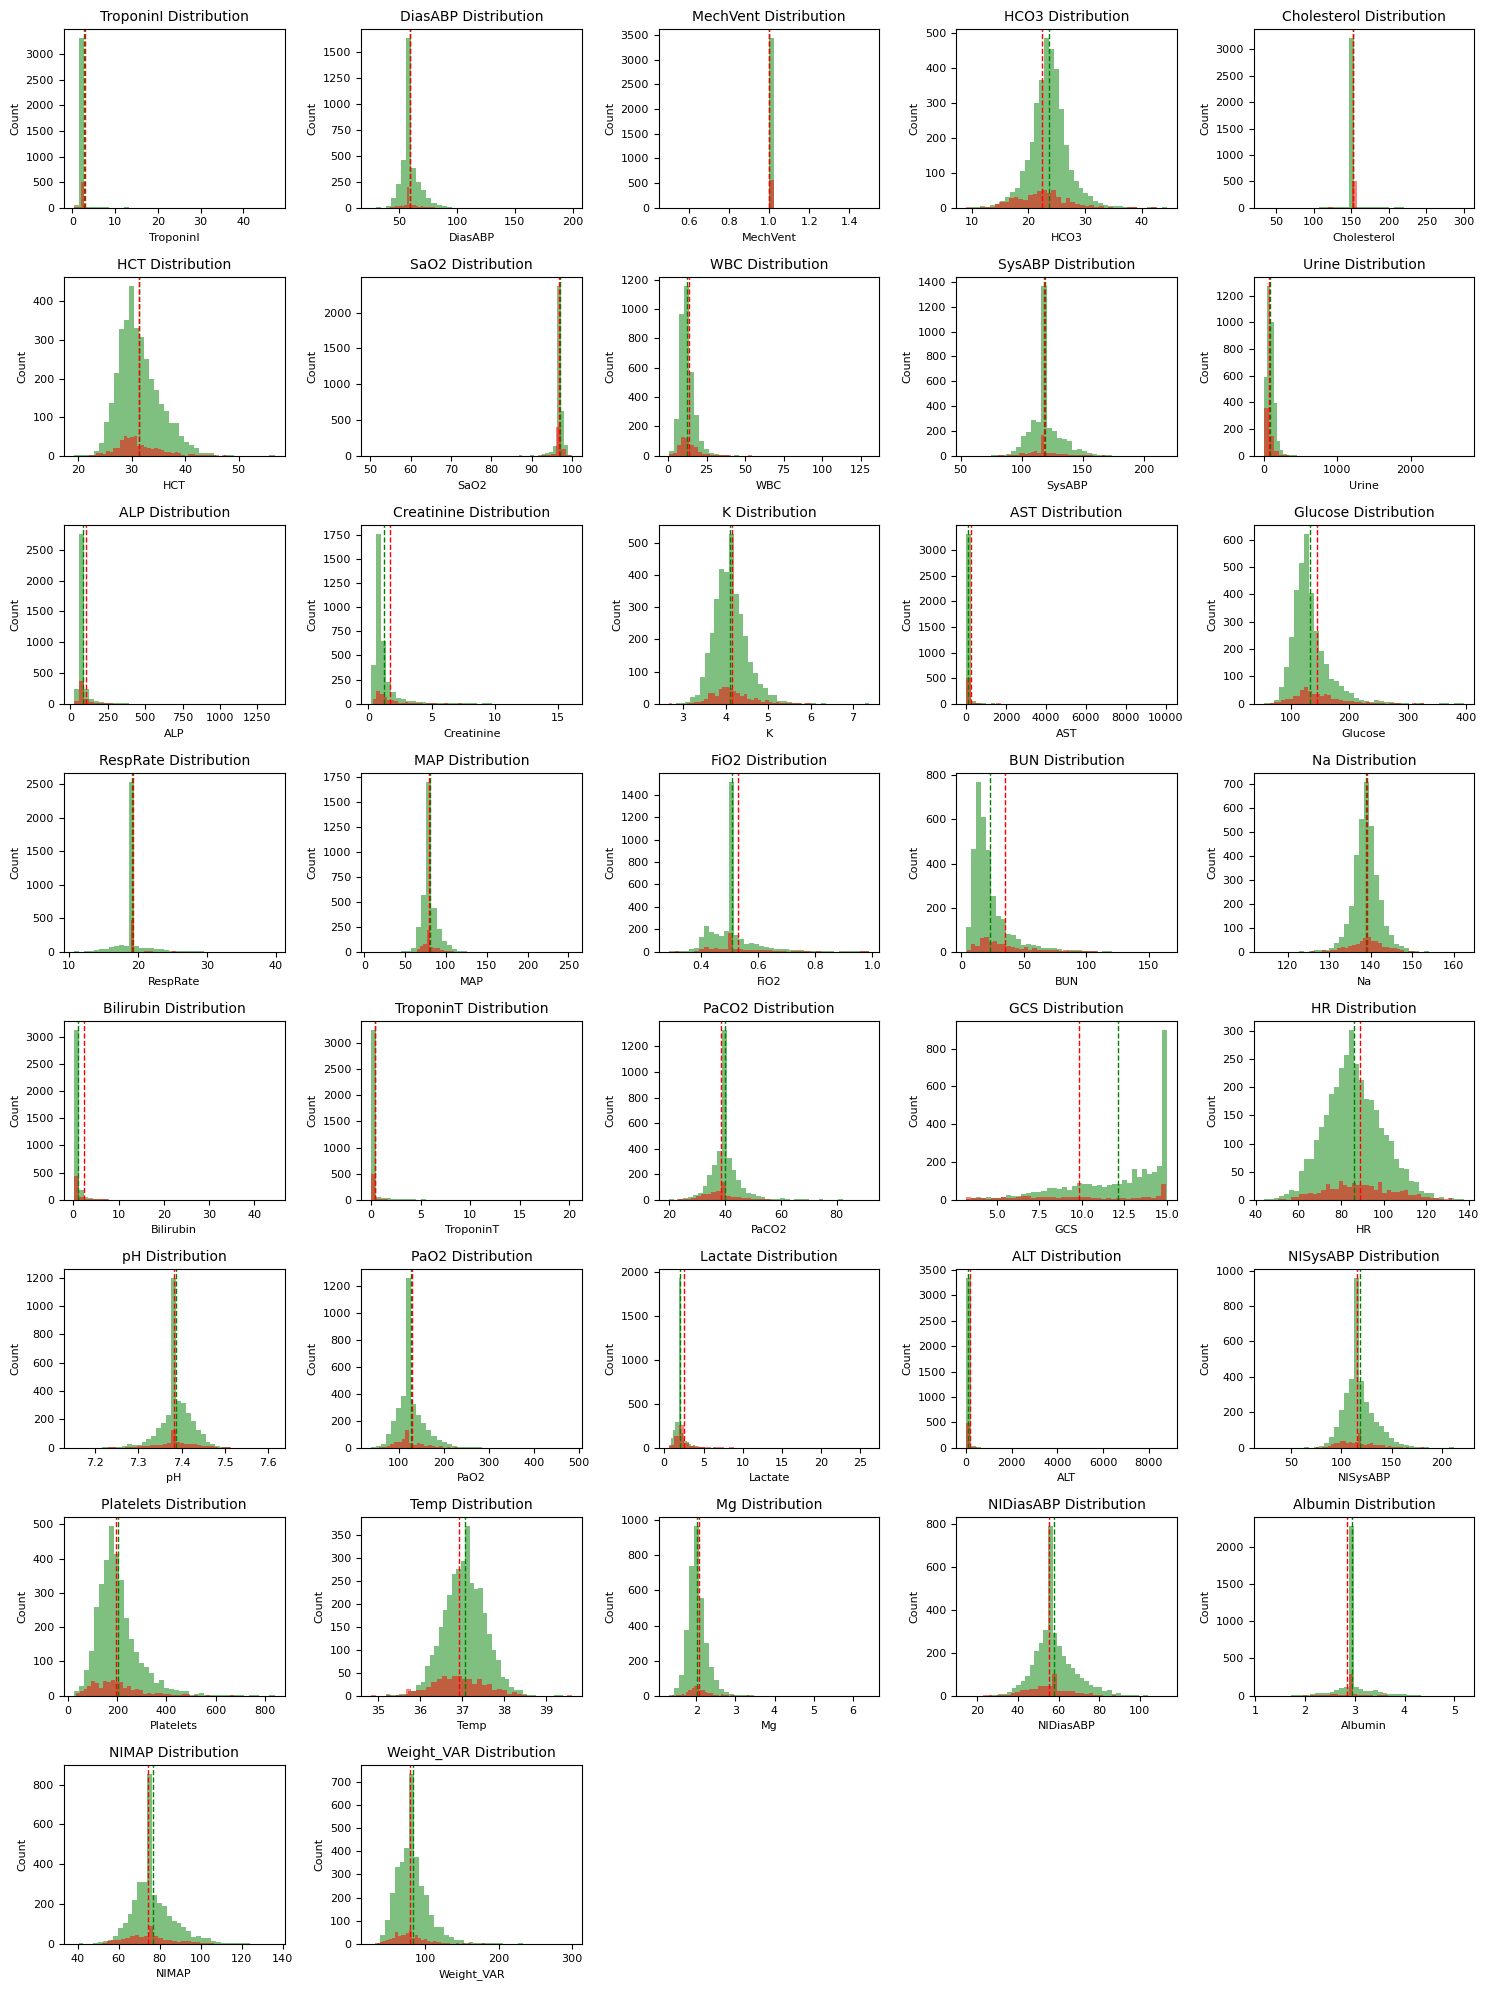

In [20]:
fig, axes = plt.subplots(8, 5, figsize=(15, 20))  # Increase figure size

for i in range(37):
    row = i // 5
    col = i % 5
    ax = axes[row, col]  

    ax.hist(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 0][dyn_variables[i]], bins=40, alpha=0.5, color='green', label="Survived")
    ax.hist(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 1][dyn_variables[i]], bins=40, alpha=0.5, color='red', label="Died")

    #  add vertical line for mean for each group
    ax.axvline(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 0][dyn_variables[i]].mean(), color='green', linestyle='dashed', linewidth=1)
    ax.axvline(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 1][dyn_variables[i]].mean(), color='red', linestyle='dashed', linewidth=1)
    
    ax.set_title(f'{dyn_variables[i]} Distribution', fontsize=10)  
    ax.set_xlabel(dyn_variables[i], fontsize=8) 
    ax.set_ylabel('Count', fontsize=8)
    ax.tick_params(axis='both', labelsize=8)  

# remove empty subplots 
for i in range(37, 40):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Optimize spacing
plt.show()


## Variance distribution

In [17]:
# compute variance for each variable grouped by RecordID in dyn_df
var_dyn_df = dyn_df.groupby(['RecordID','In-hospital_death']).var().reset_index()

var_dyn_df['In-hospital_death'].unique()

array([0, 1])

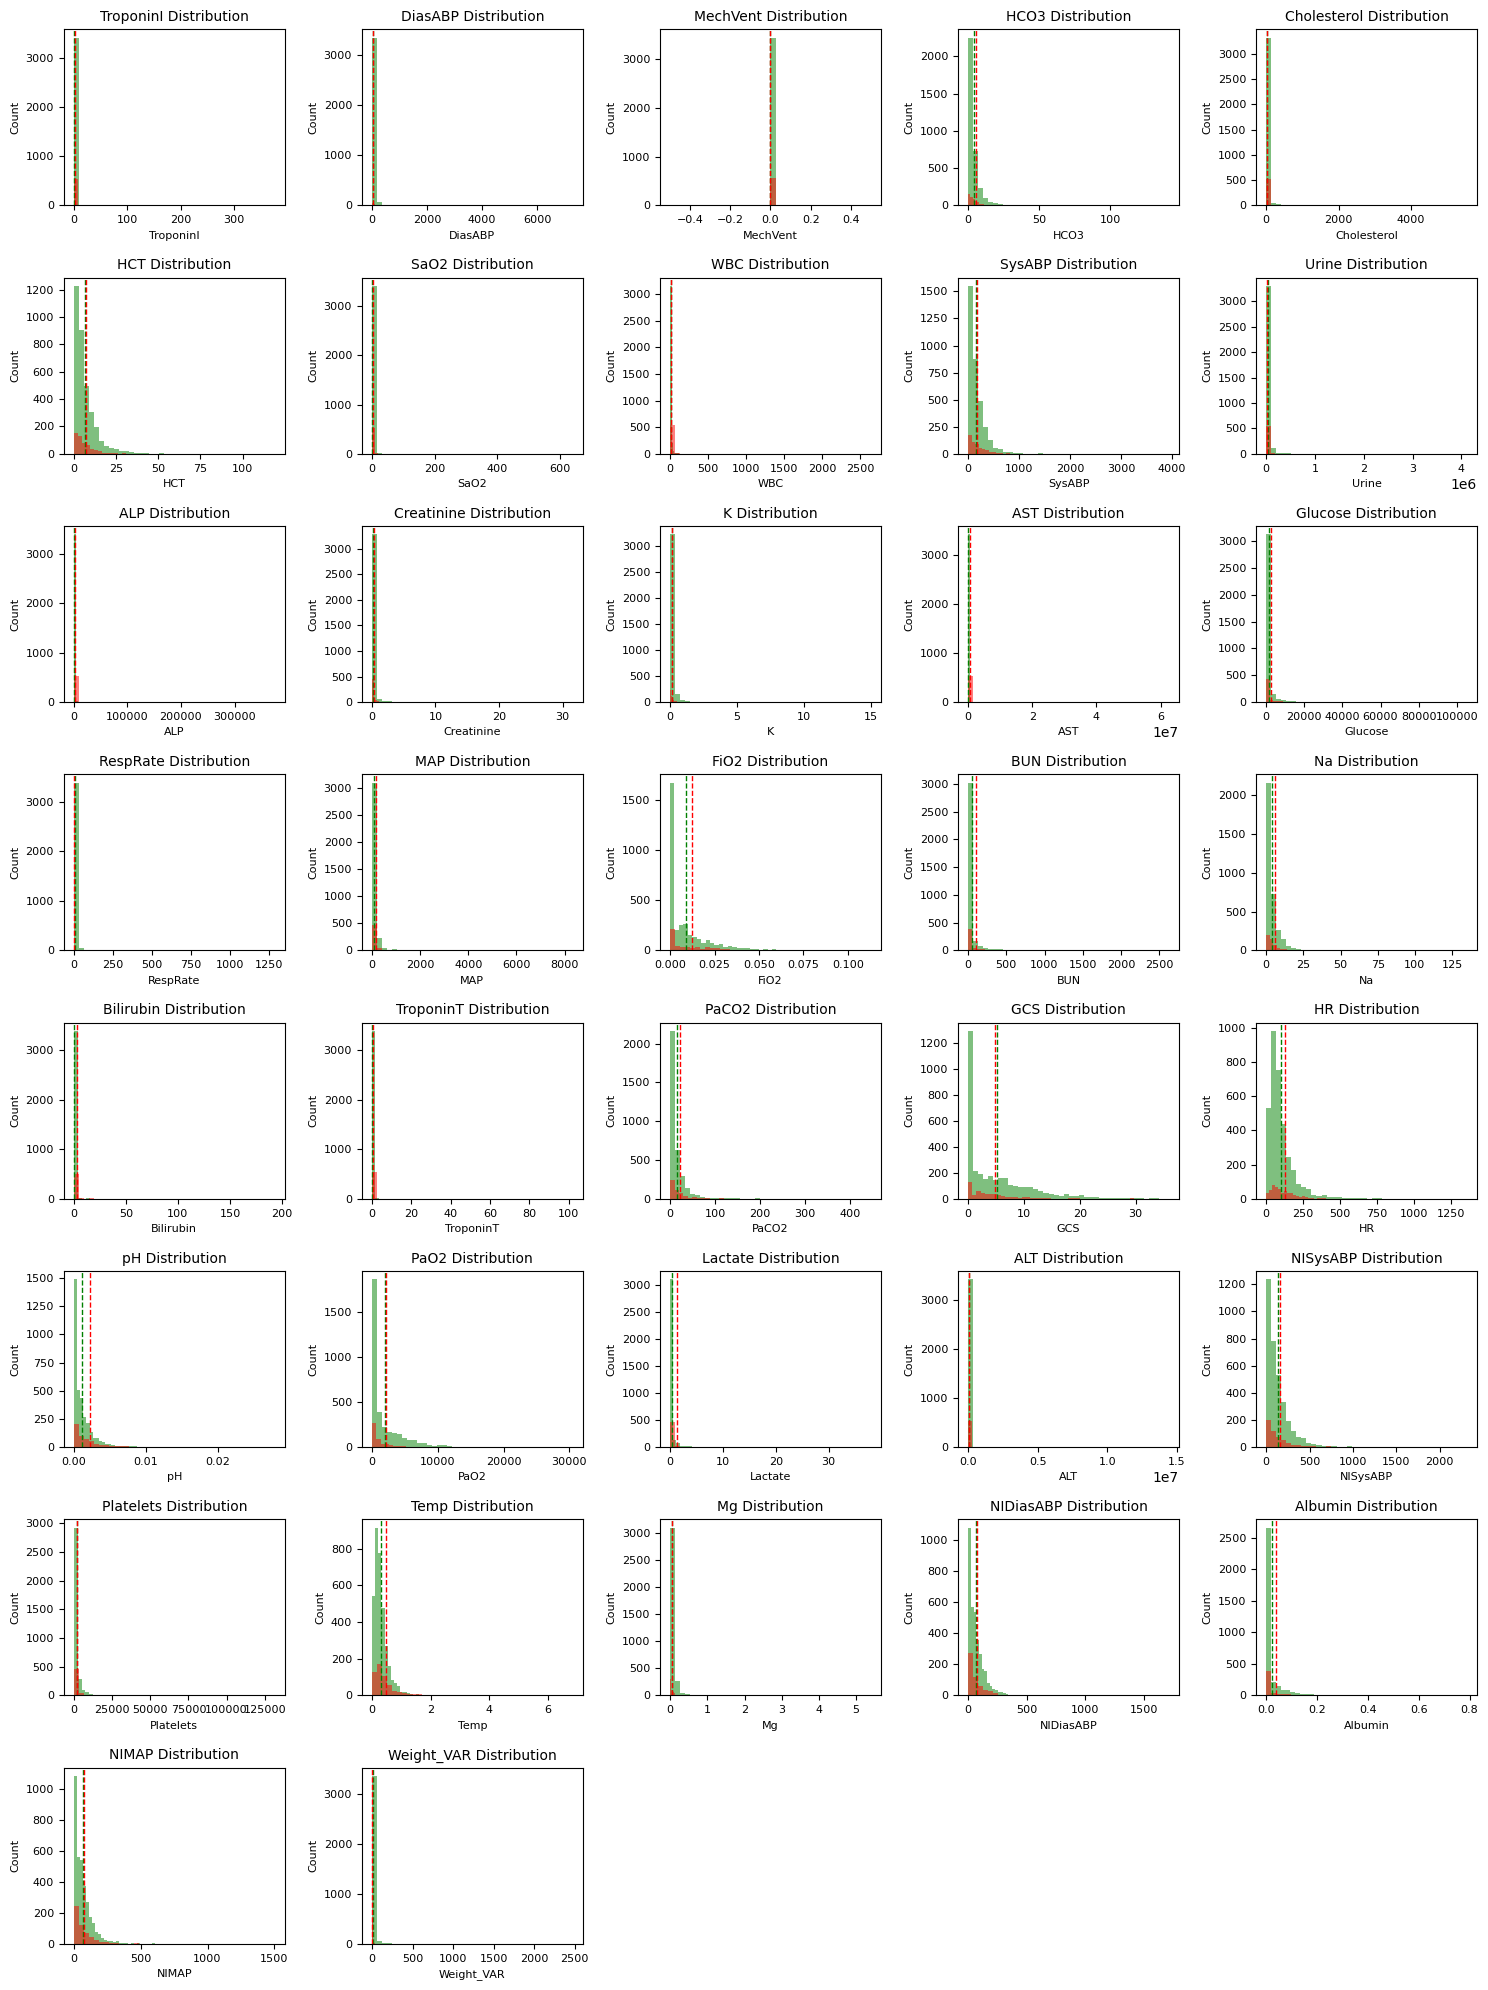

In [23]:
fig, axes = plt.subplots(8, 5, figsize=(15, 20))  # Increase figure size

for i in range(37):
    row = i // 5
    col = i % 5
    ax = axes[row, col]  

    ax.hist(var_dyn_df[var_dyn_df['In-hospital_death'] == 0][dyn_variables[i]], bins=40, alpha=0.5, color='green', label="Survived")
    ax.hist(var_dyn_df[var_dyn_df['In-hospital_death'] == 1][dyn_variables[i]], bins=40, alpha=0.5, color='red', label="Died")

    #  add vertical line for mean for each group
    ax.axvline(var_dyn_df[var_dyn_df['In-hospital_death'] == 0][dyn_variables[i]].mean(), color='green', linestyle='dashed', linewidth=1)
    ax.axvline(var_dyn_df[var_dyn_df['In-hospital_death'] == 1][dyn_variables[i]].mean(), color='red', linestyle='dashed', linewidth=1)
    
    ax.set_title(f'{dyn_variables[i]} Distribution', fontsize=10)  
    ax.set_xlabel(dyn_variables[i], fontsize=8) 
    ax.set_ylabel('Count', fontsize=8)
    ax.tick_params(axis='both', labelsize=8)  

# remove empty subplots 
for i in range(37, 40):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Optimize spacing
plt.show()


## Correlation btw variables

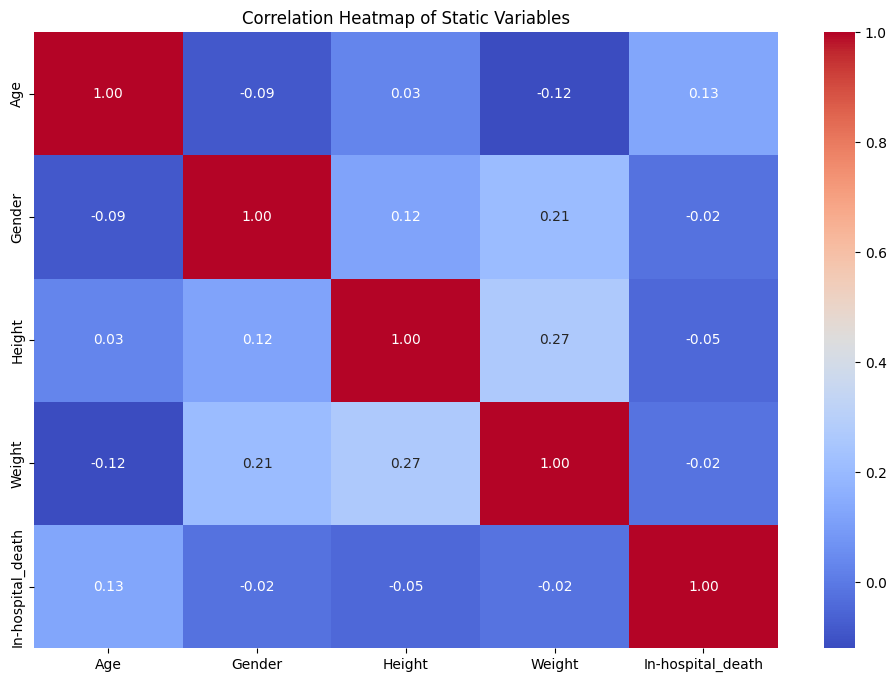

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(static_df.drop(columns=['RecordID']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Static Variables")
plt.show()


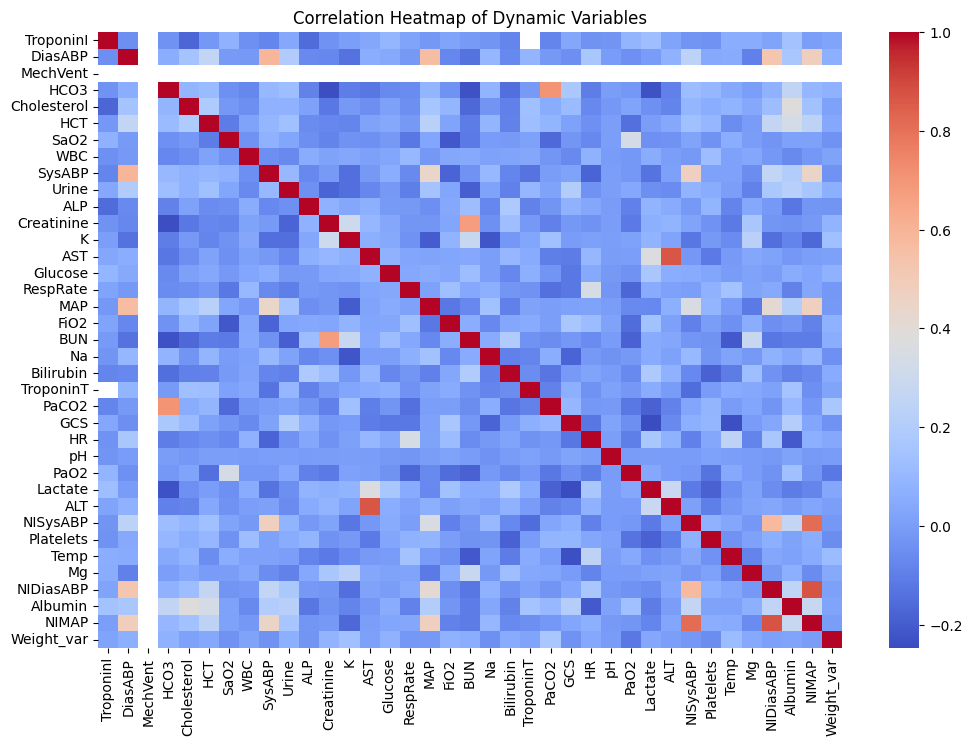

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(mean_dyn_df.drop(columns=['RecordID', 'In-hospital_death']).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Dynamic Variables")
plt.show()


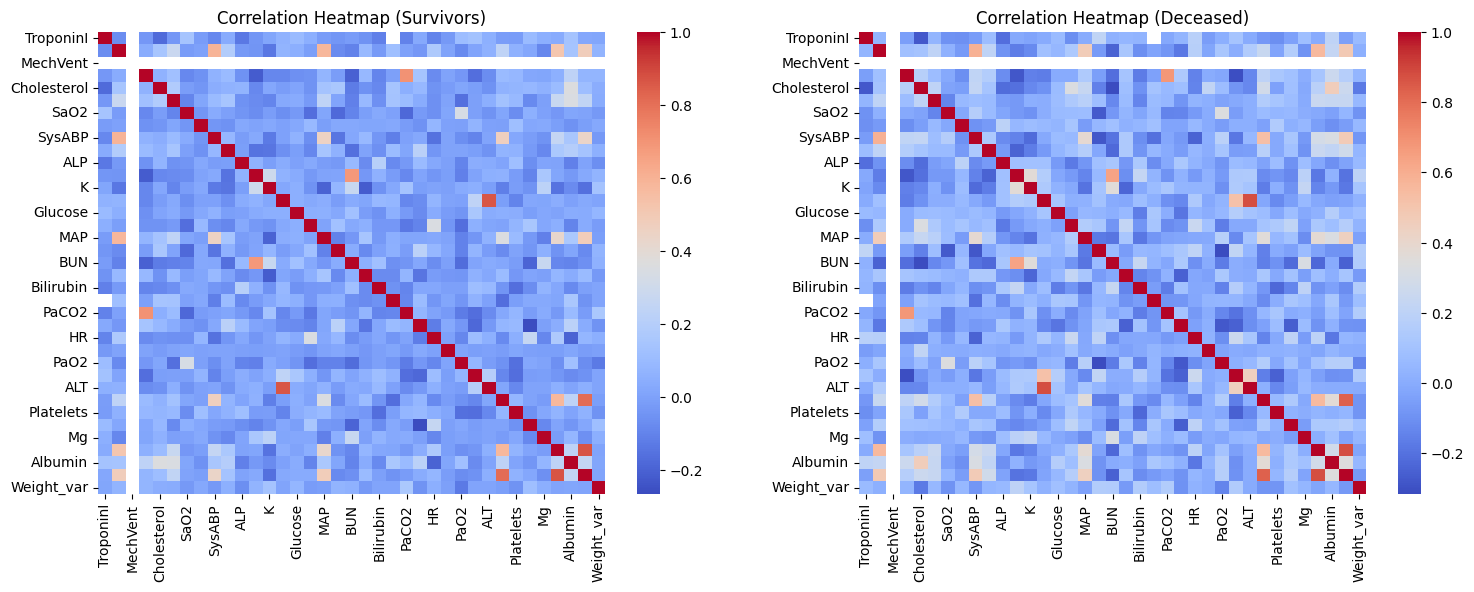

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# correl for survivors
sns.heatmap(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 0].drop(columns=['RecordID', 'In-hospital_death']).corr(),
            cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation Heatmap (Survivors)")

# correl for deceased patients
sns.heatmap(mean_dyn_df[mean_dyn_df['In-hospital_death'] == 1].drop(columns=['RecordID', 'In-hospital_death']).corr(),
            cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Heatmap (Deceased)")

plt.show()


## Time evolution of variables 

In [ ]:
# df merge with outcomes 
df = df.merge(outcomes, on='RecordID', how='left')
df

RecordID   Age  Gender  Height  Weight  Timestamp  TroponinI  DiasABP   
0       132539.0  54.0     0.0    -1.0    -1.0        0.0        NaN      NaN  \
1       132539.0  54.0     0.0    -1.0    -1.0        1.0        NaN      NaN   
2       132539.0  54.0     0.0    -1.0    -1.0        2.0        NaN      NaN   
3       132539.0  54.0     0.0    -1.0    -1.0        3.0        NaN      NaN   
4       132539.0  54.0     0.0    -1.0    -1.0        4.0        NaN      NaN   
...          ...   ...     ...     ...     ...        ...        ...      ...   
587995  163037.0  74.0     0.0    -1.0    73.1       44.0        NaN     51.0   
587996  163037.0  74.0     0.0    -1.0    73.1       45.0        NaN      NaN   
587997  163037.0  74.0     0.0    -1.0    73.1       46.0        NaN     56.0   
587998  163037.0  74.0     0.0    -1.0    73.1       47.0        NaN     50.0   
587999  163037.0  74.0     0.0    -1.0    73.1       48.0        NaN     47.0   

        MechVent  HCO3  ...  ALT  NISysABP  Platelets   Temp  Mg  NIDiasABP   
0            NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN  \
1            NaN   NaN  ...  NaN     152.0        NaN  35.35 NaN       61.5   
2            NaN   NaN  ...  NaN     137.0        NaN    NaN NaN       62.0   
3            NaN   NaN  ...  NaN     123.0        NaN    NaN NaN       52.0   
4            NaN   NaN  ...  NaN     114.0        NaN  37.80 NaN       52.0   
...          ...   ...  ...  ...       ...        ...    ...  ..        ...   
587995       NaN   NaN  ...  NaN     108.0        NaN    NaN NaN       55.0   
587996       NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   
587997       1.0   NaN  ...  NaN      95.0        NaN  37.30 NaN       51.0   
587998       NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   
587999       NaN   NaN  ...  NaN       NaN        NaN    NaN NaN        NaN   

        Albumin   NIMAP  Weight_var  In-hospital_death  
0           NaN     NaN         NaN                  0  
1           NaN  91.665         NaN                  0  
2           NaN  87.000         NaN                  0  
3           NaN  75.670         NaN                  0  
4           NaN  72.670         NaN                  0  
...         ...     ...         ...                ...  
587995      NaN  67.000         NaN                  0  
587996      NaN     NaN         NaN                  0  
587997      NaN  61.000         NaN                  0  
587998      NaN     NaN         NaN                  0  
587999      NaN     NaN         NaN                  0  

[588000 rows x 44 columns]

In [ ]:

plt.figure(figsize=(10, 5))  # Set figure size



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

C:\Users\thoma\AppData\Local\Temp\ipykernel_18632\601519748.py:22: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim(y_min, y_max)
C:\Users\thoma\AppData\Local\Temp\ipykernel_18632\601519748.py:35: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim(y_min, y_max)
C:\Users\thoma\AppData\Local\Temp\ipykernel_18632\601519748.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create two side-by-side plots


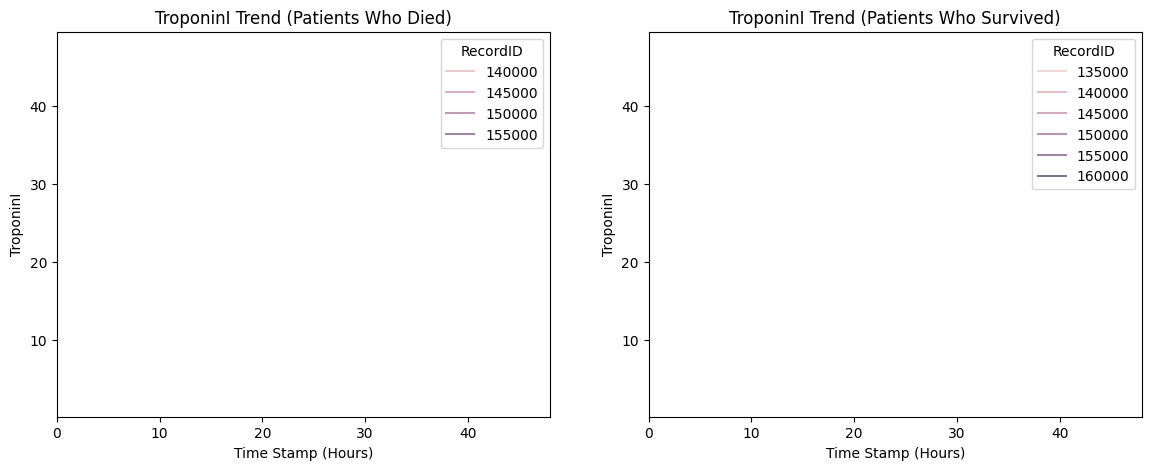

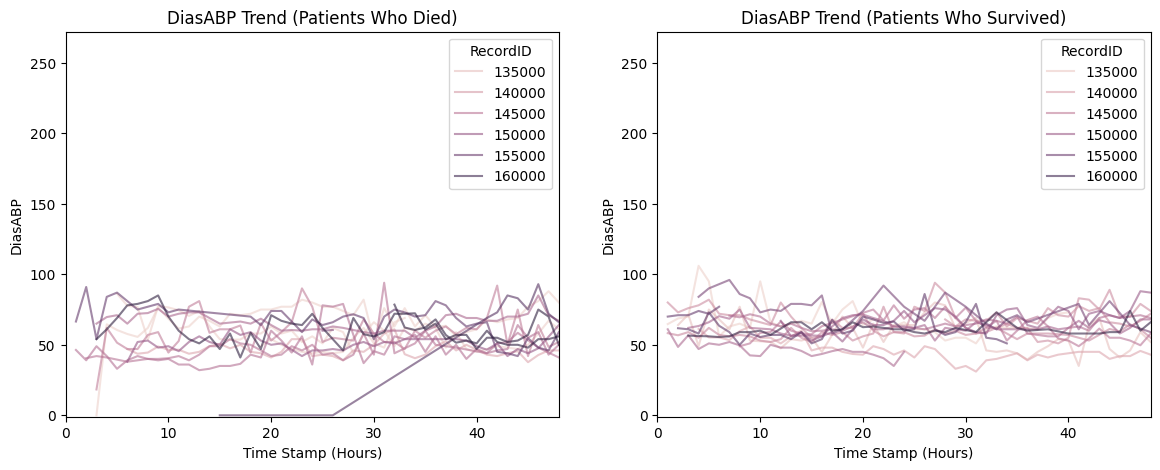

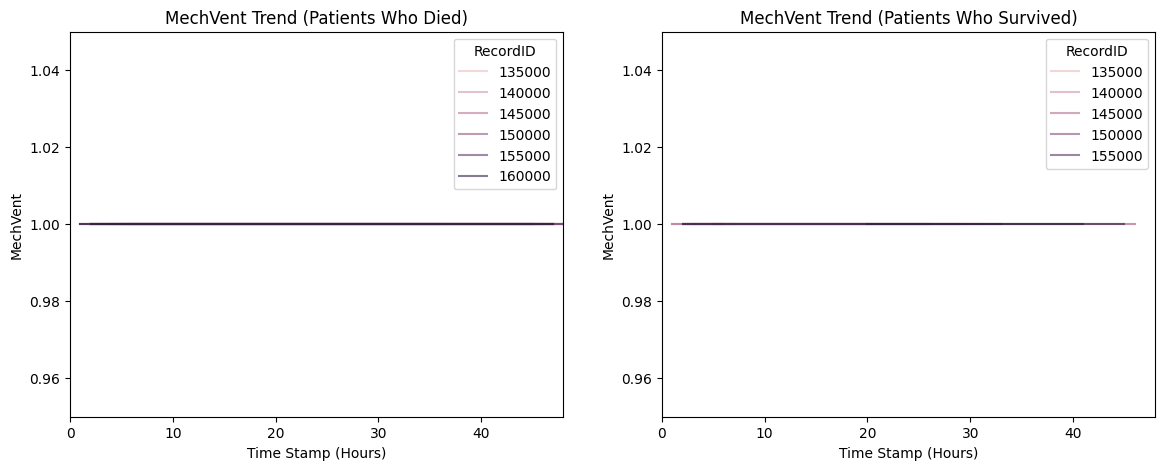

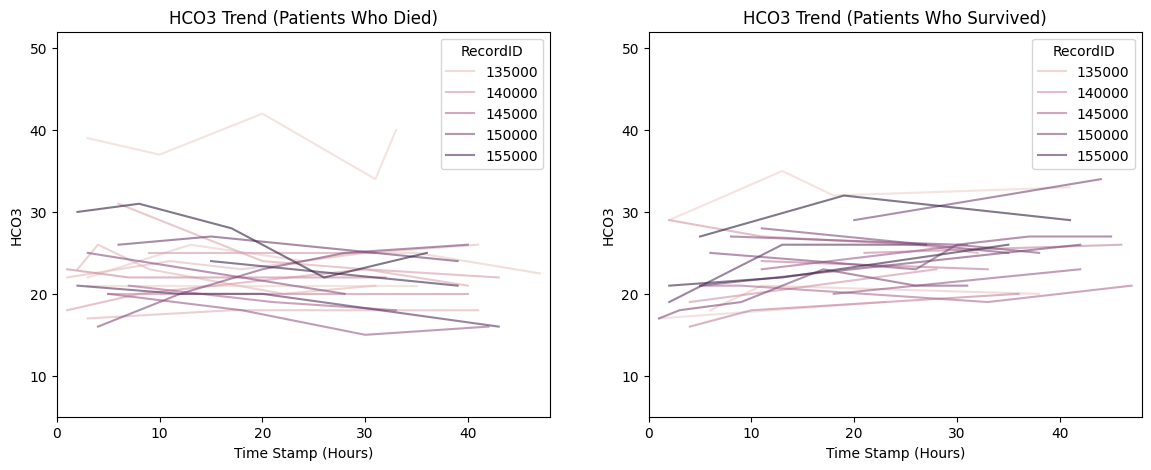

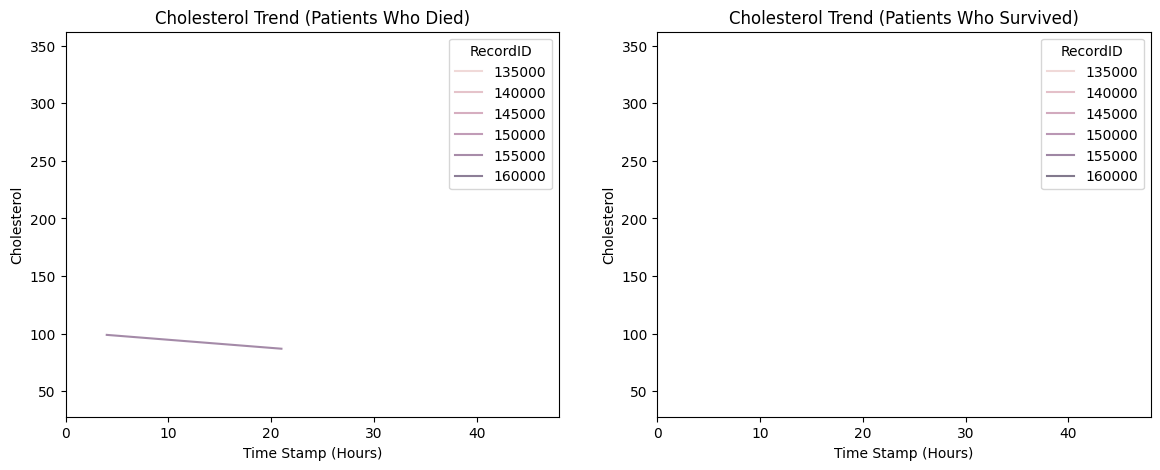

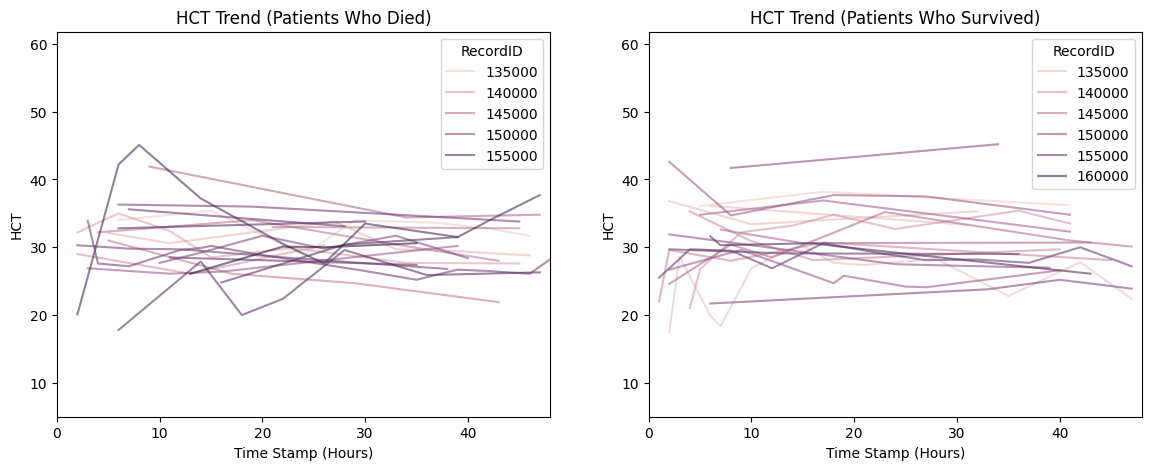

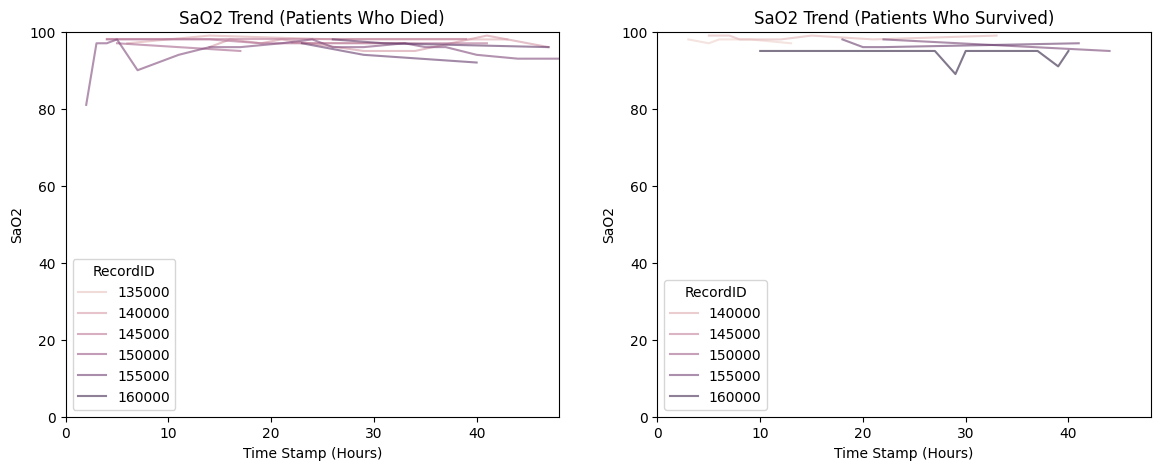

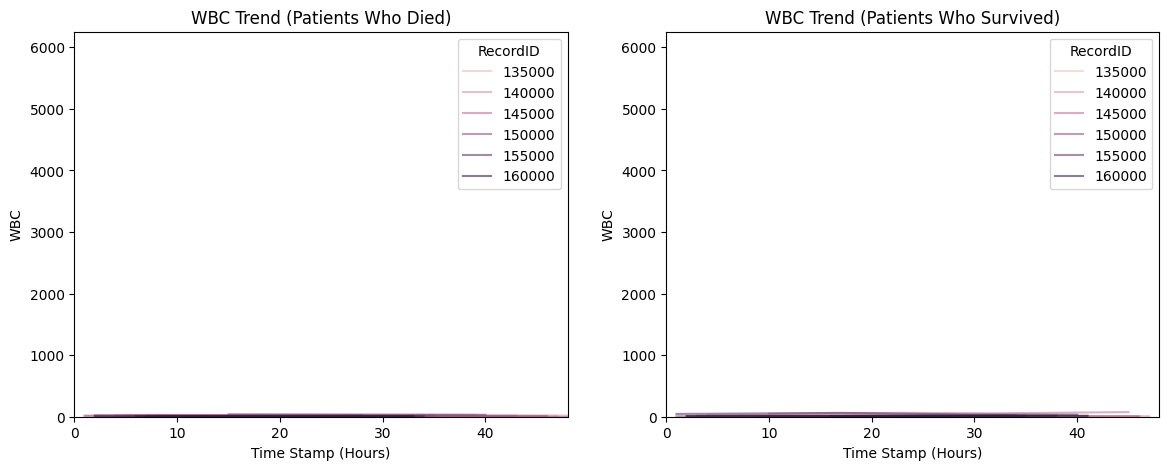

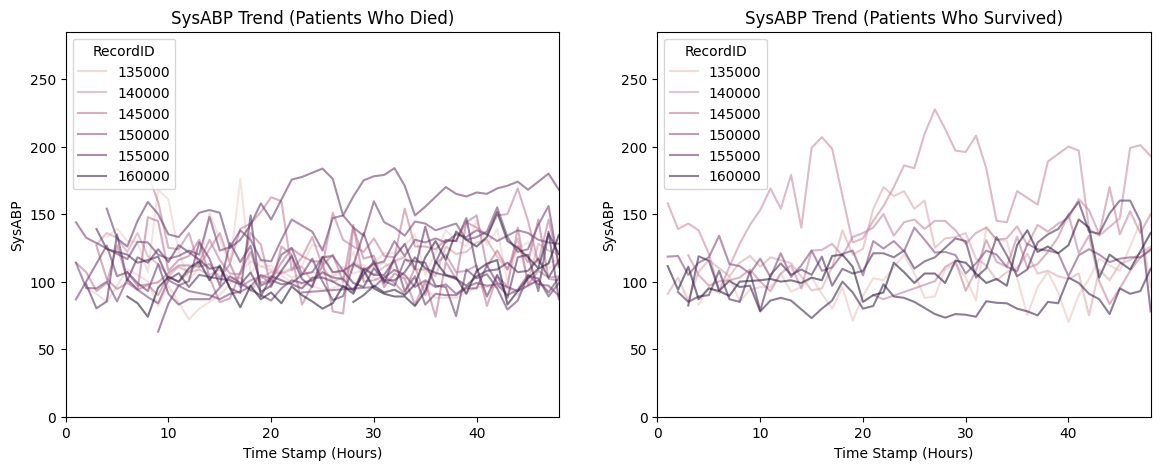

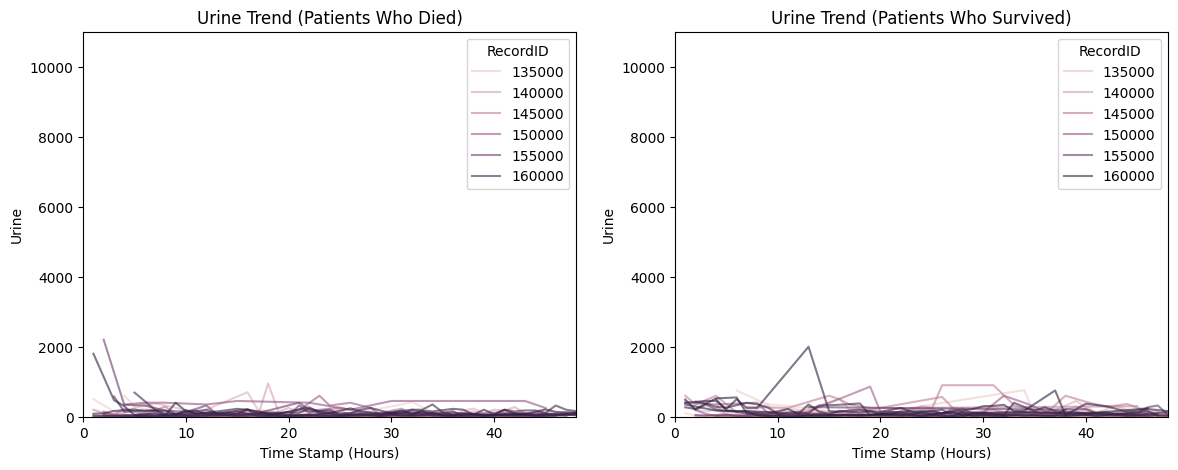

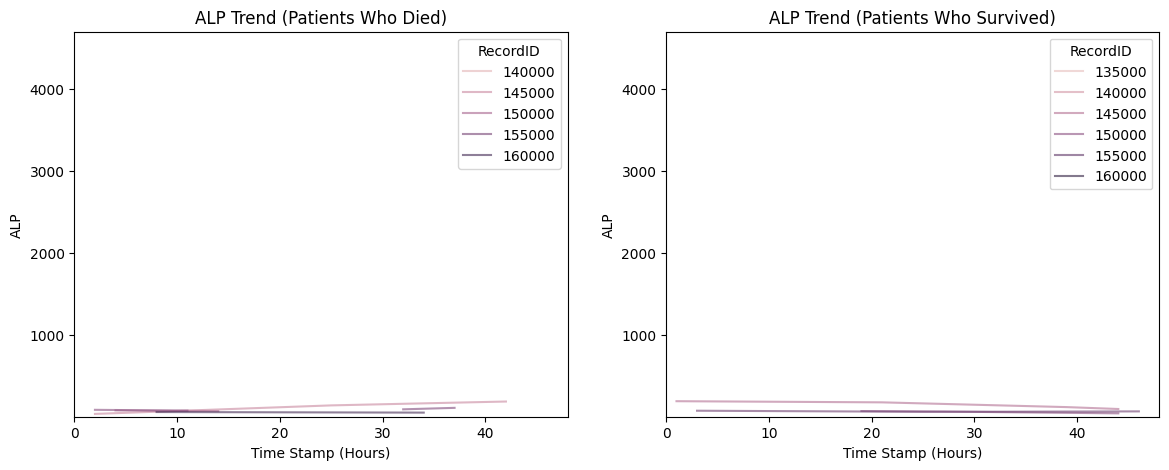

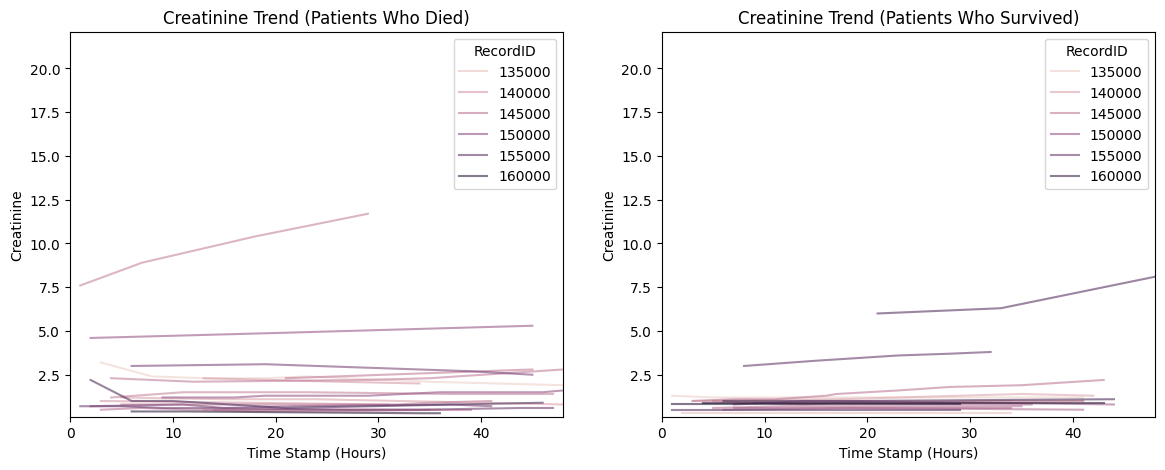

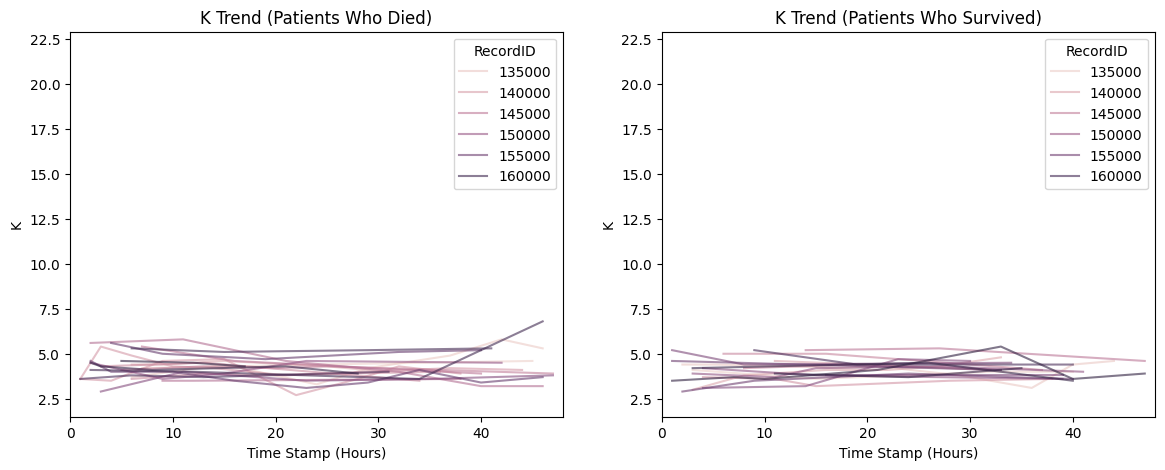

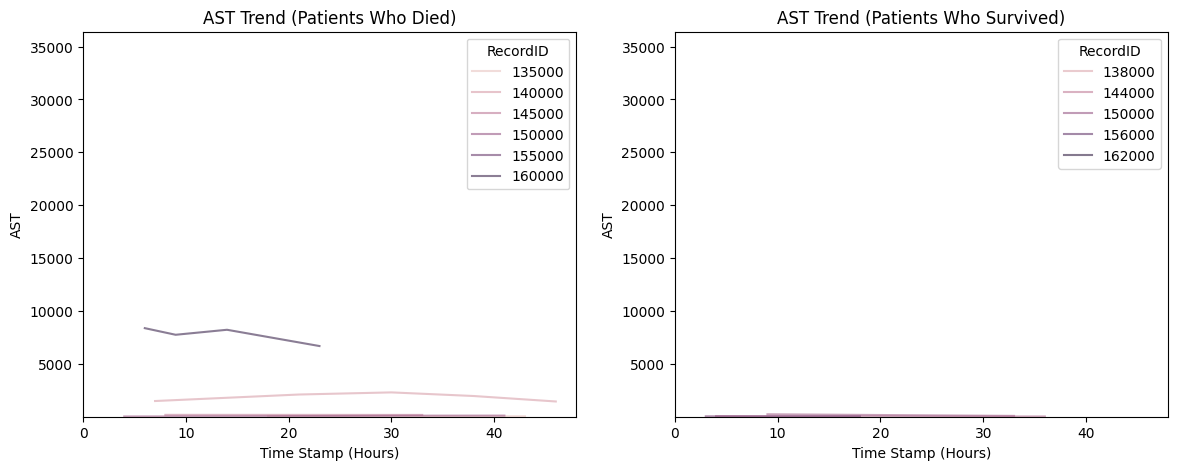

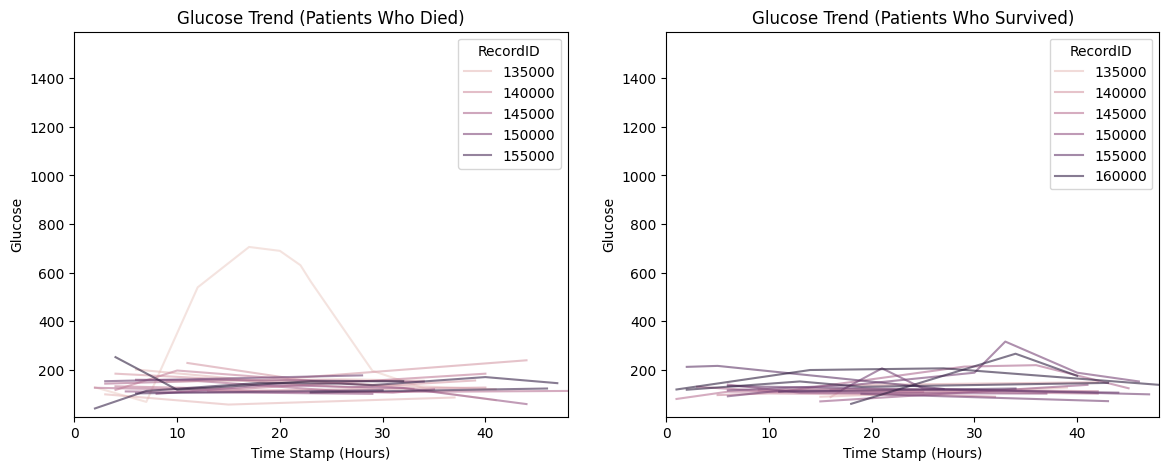

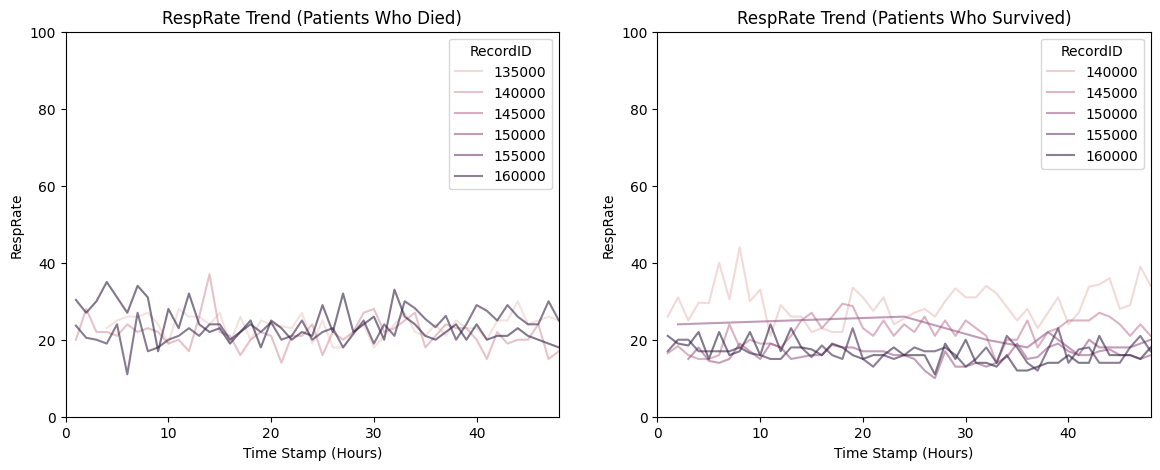

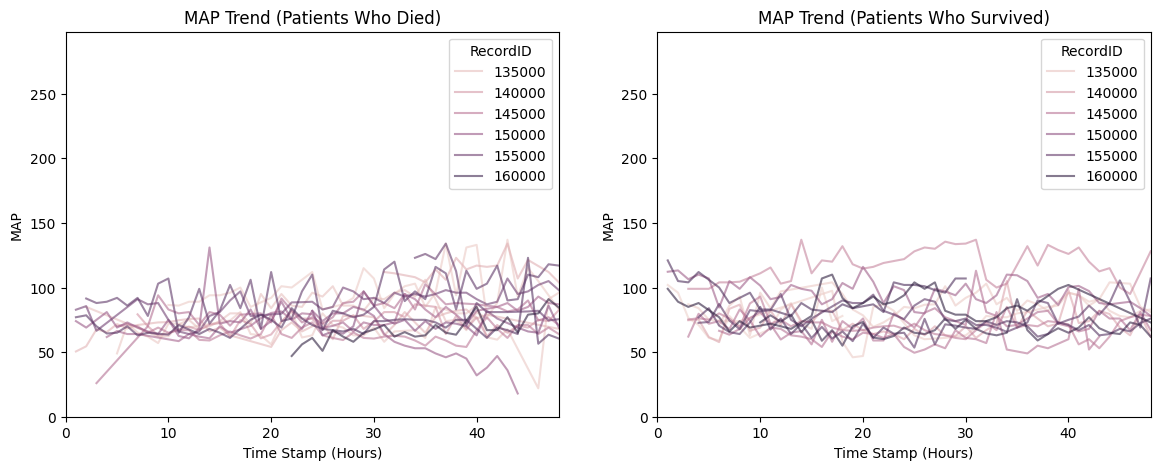

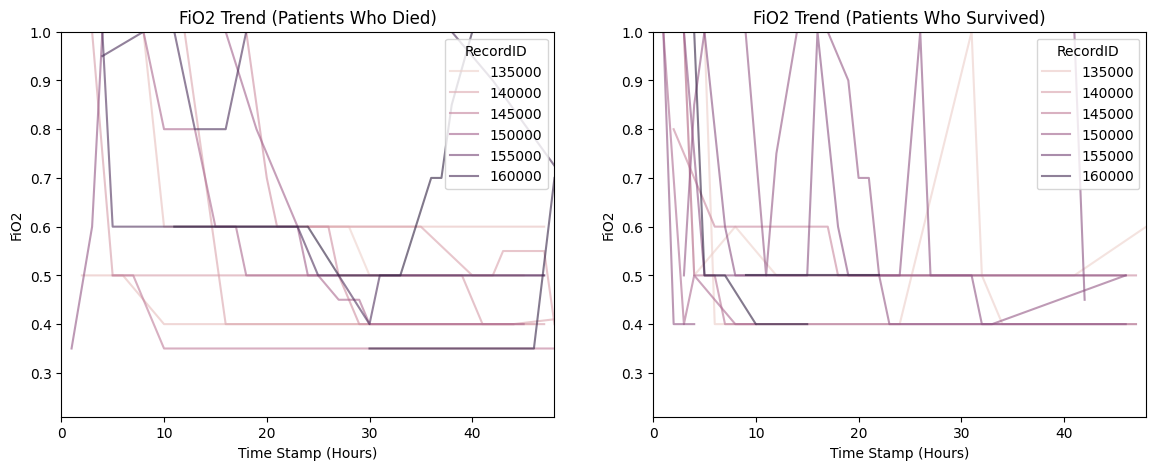

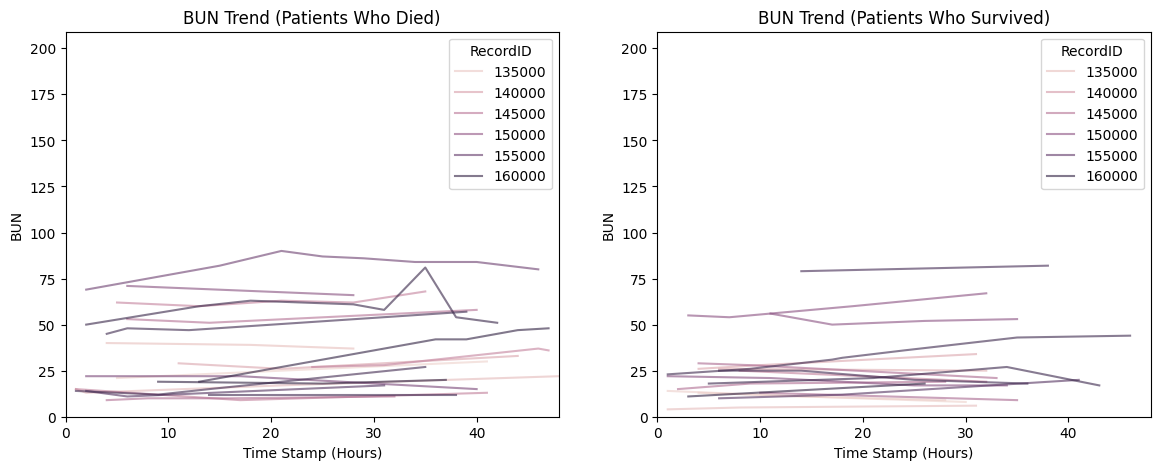

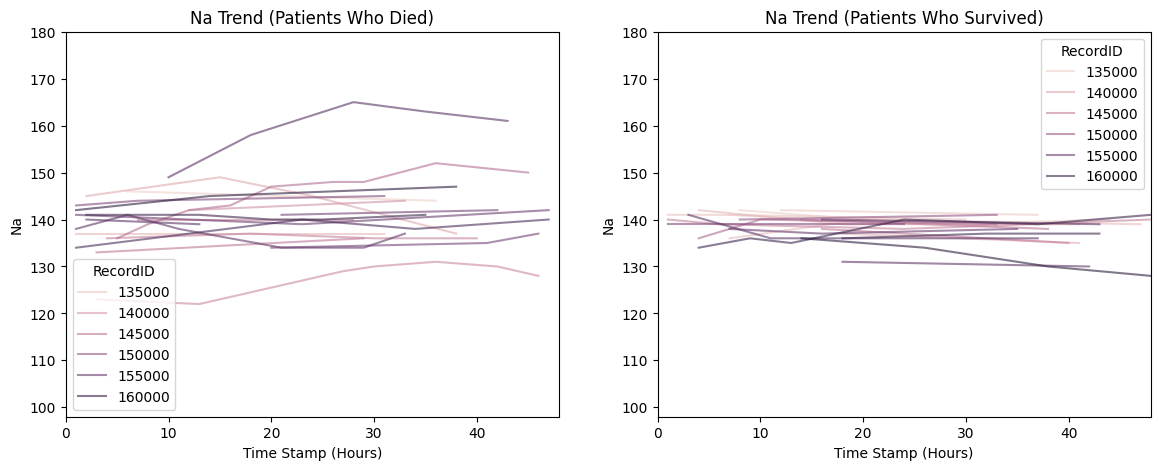

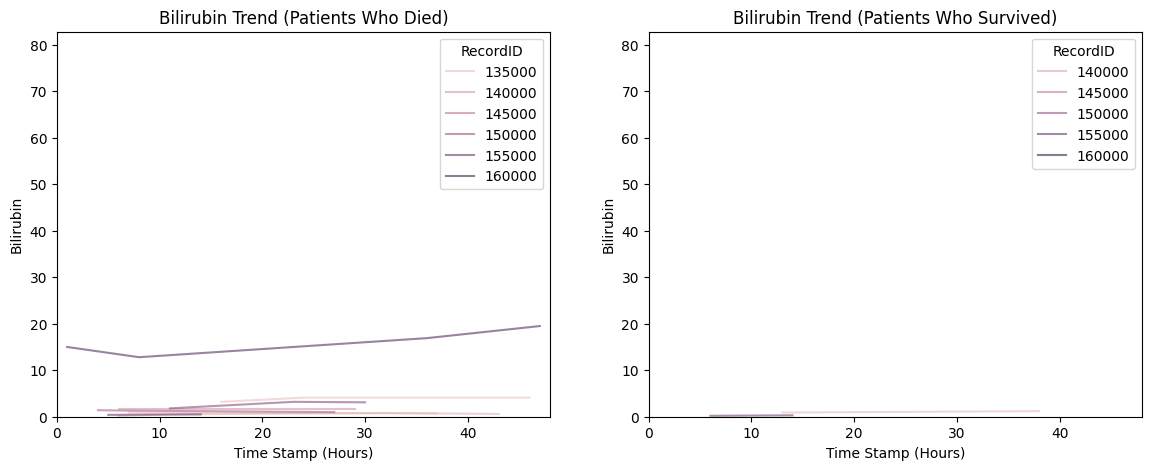

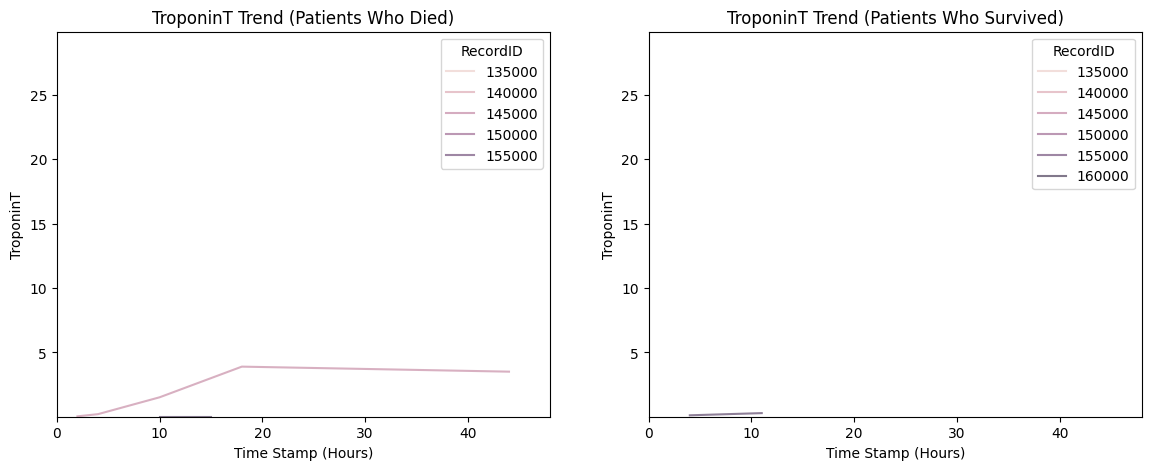

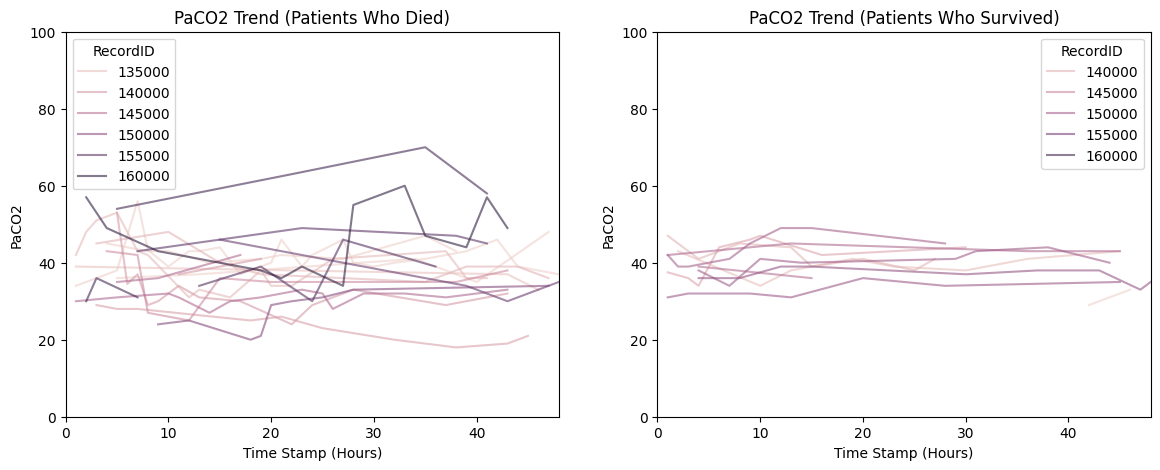

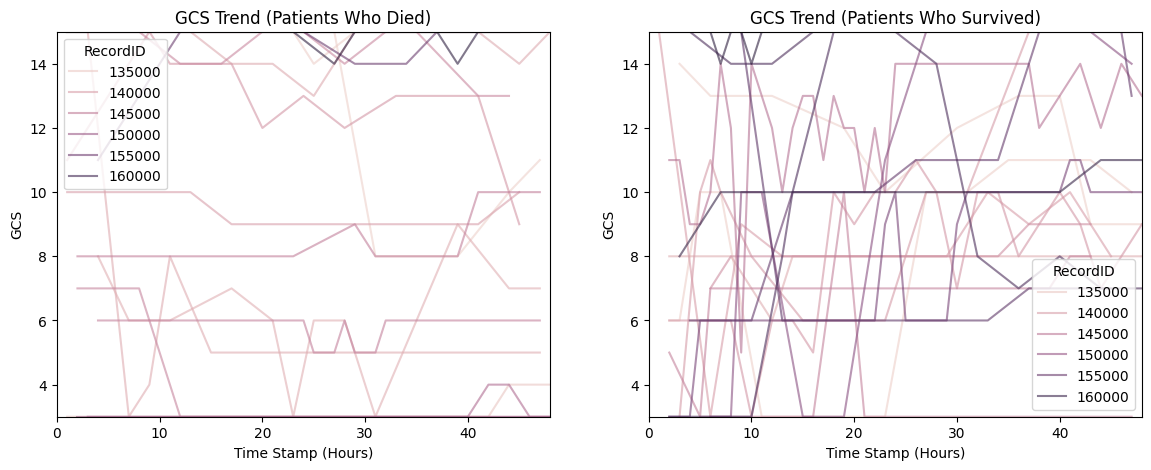

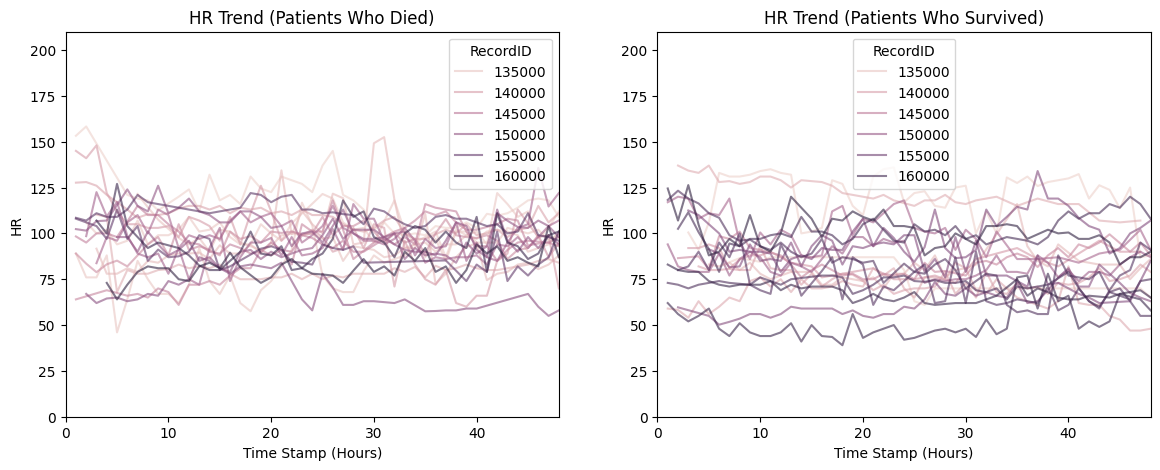

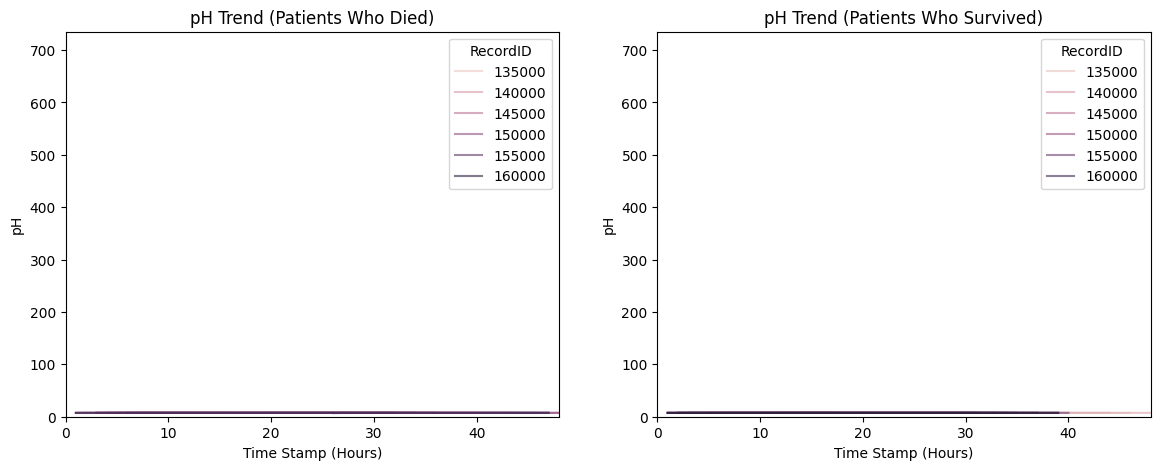

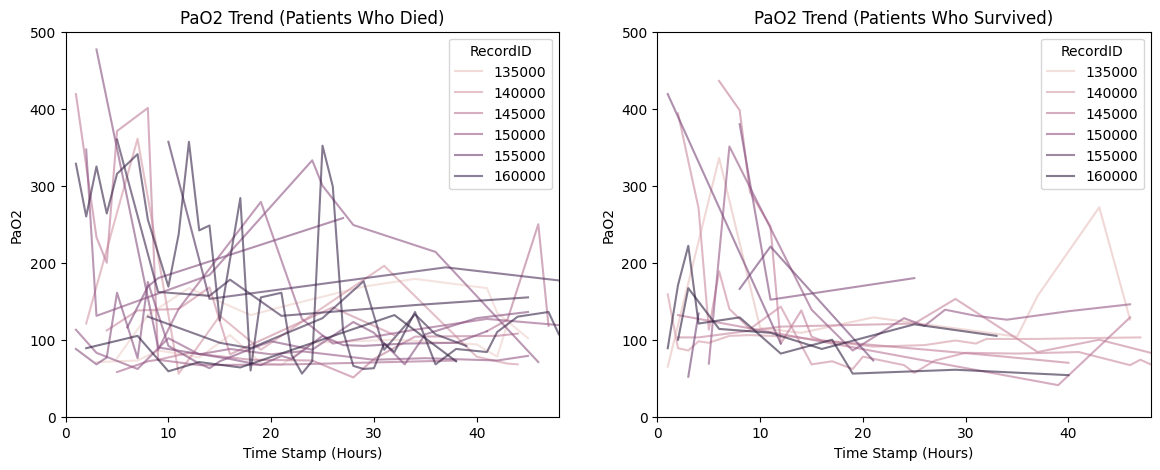

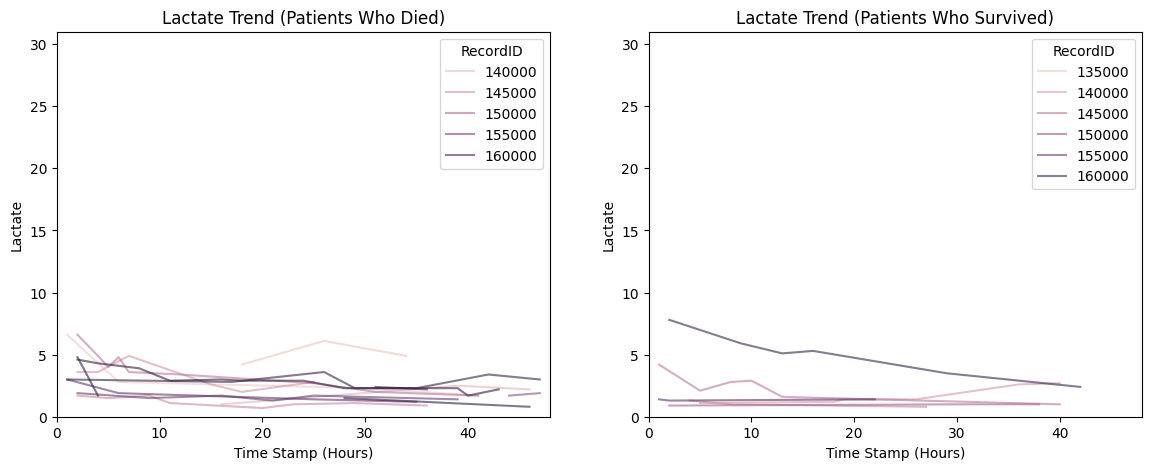

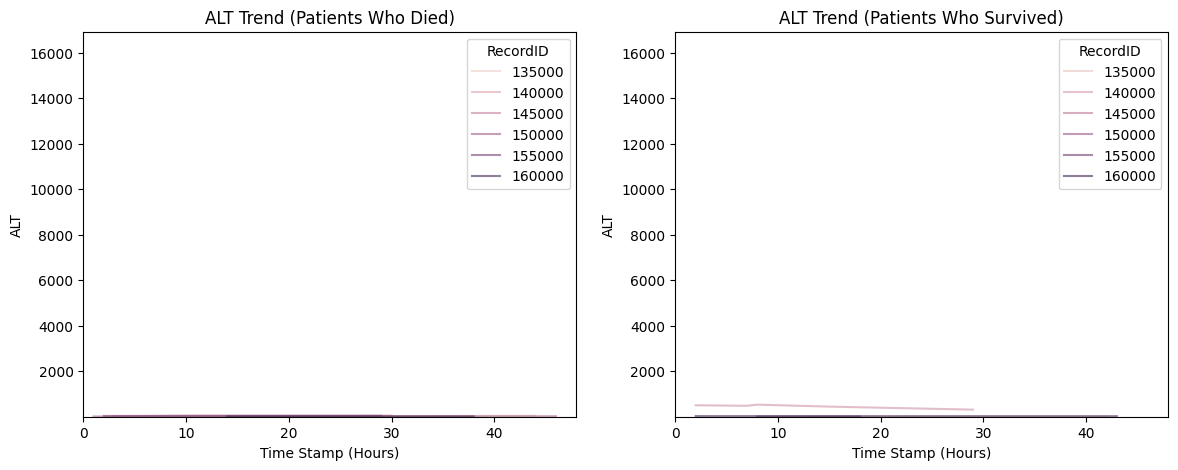

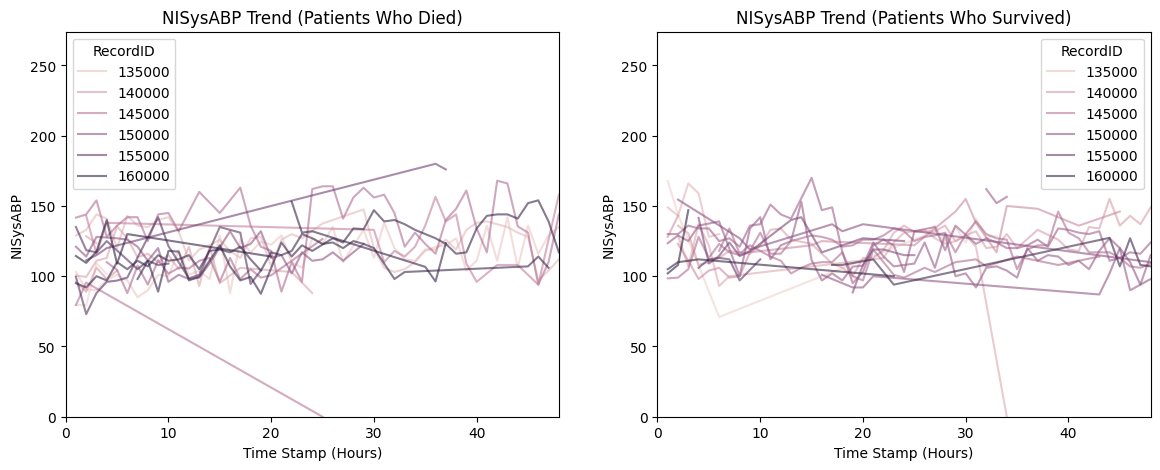

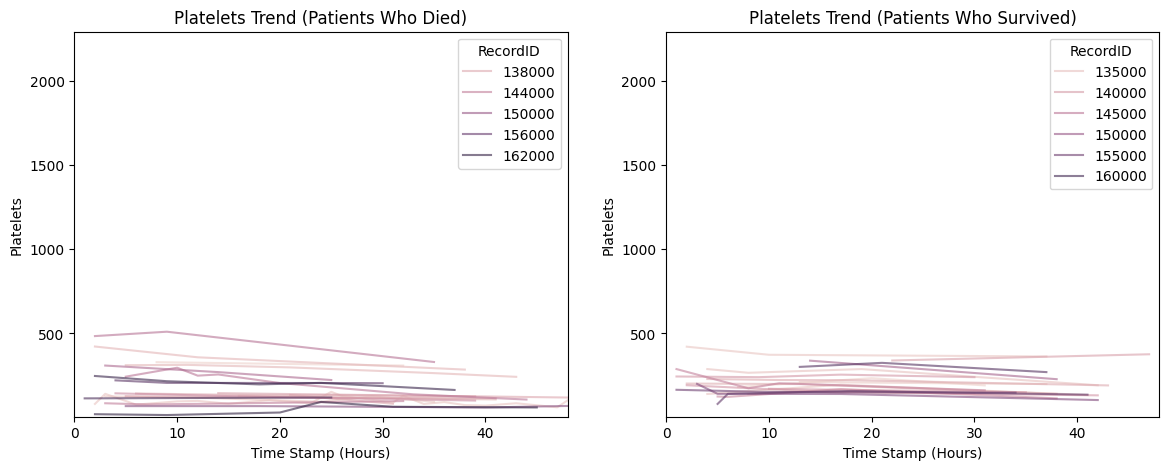

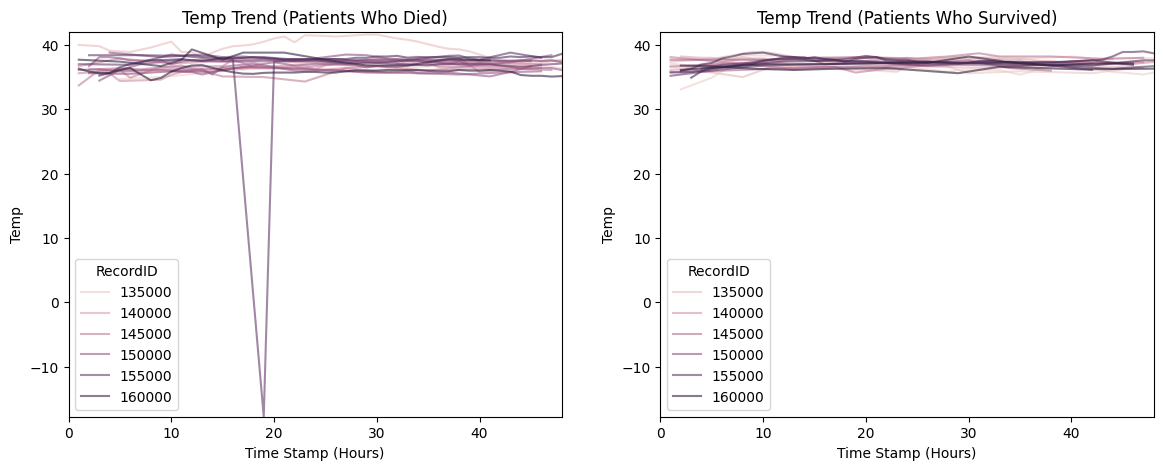

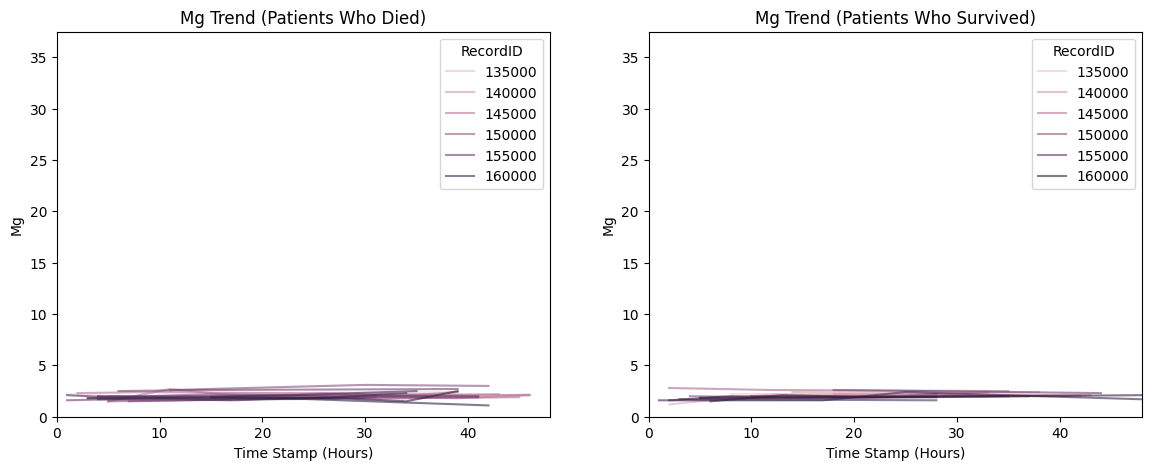

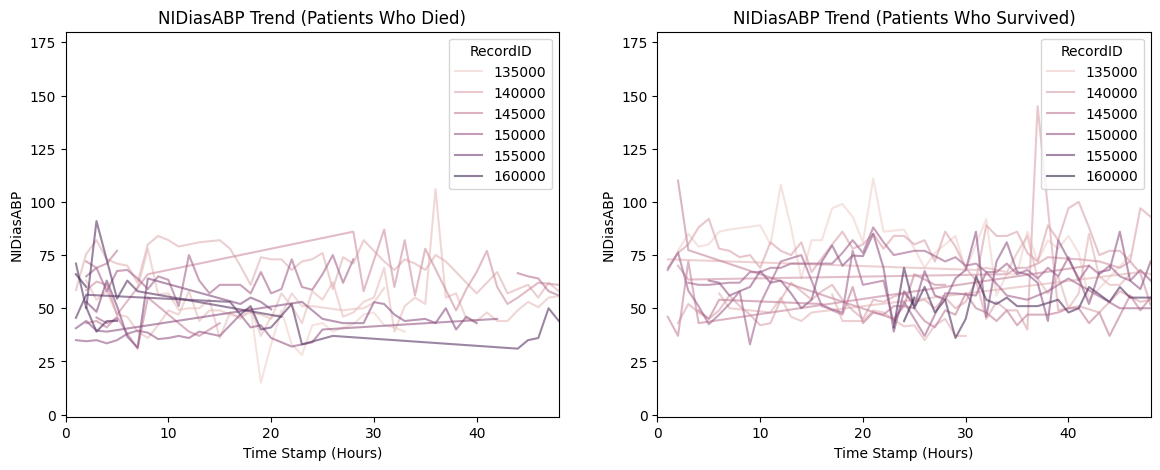

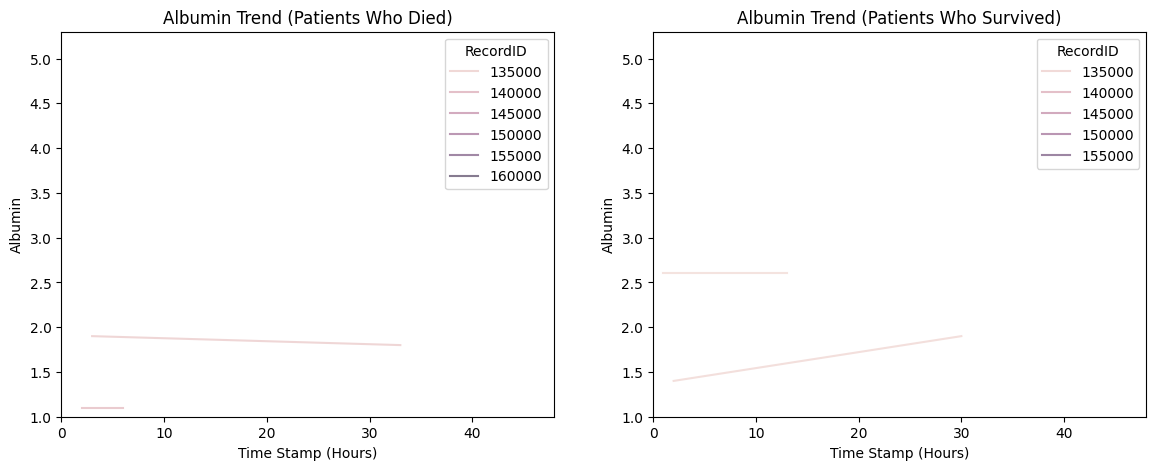

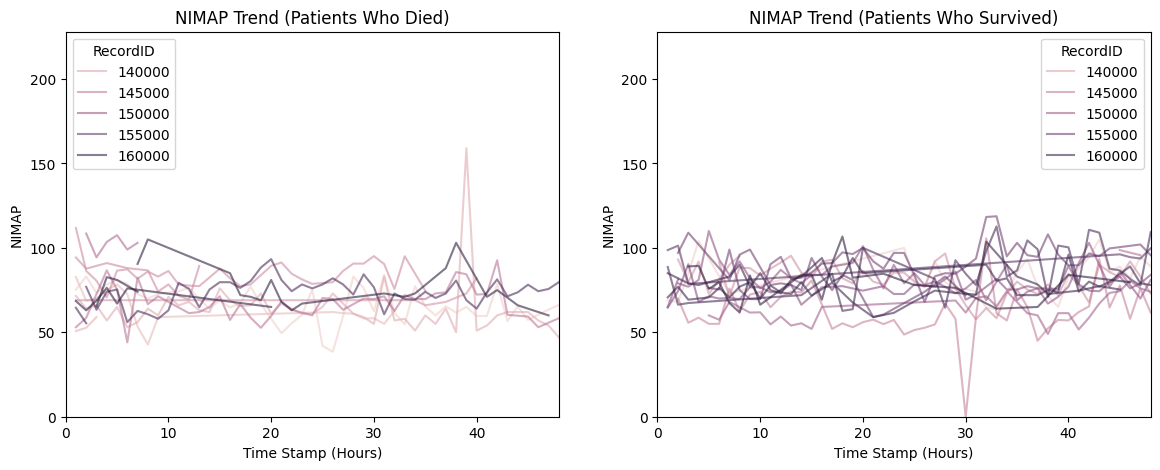

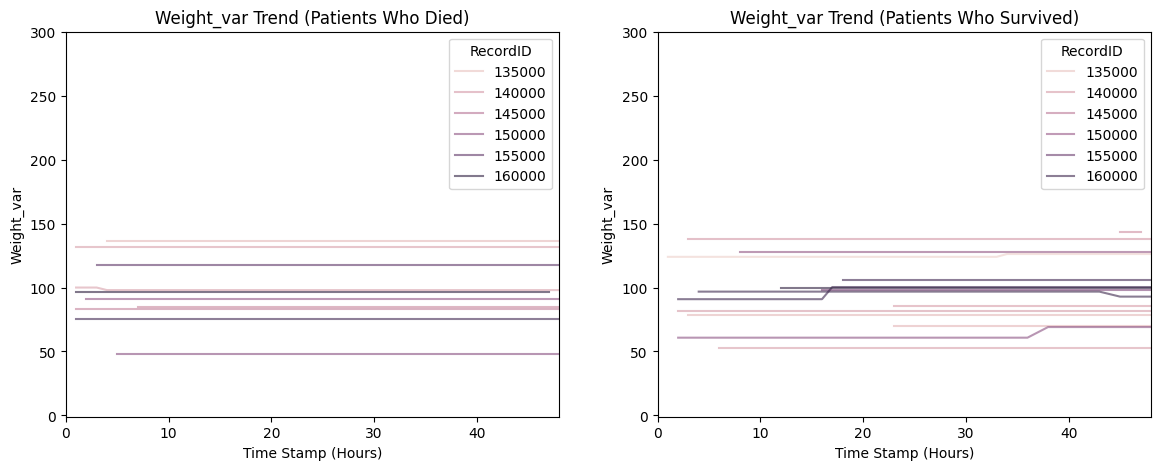

In [ ]:
for dyn_var in dyn_variables:
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create two side-by-side plots

    x_min, x_max = df["Timestamp"].min(), df["Timestamp"].max()
    y_min, y_max = df[dyn_var].min(), df[dyn_var].max()

    sample_patients_die = df[df['In-hospital_death']==1]["RecordID"].sample(20)  
    sample_patients_die
    sample_data_die = df[df["RecordID"].isin(sample_patients_die)]

    sample_data_die

    # Line plot of Heart Rate over time for selected patients
    
    sns.lineplot(sample_data_die, x="Timestamp", y=dyn_var, hue="RecordID", alpha=0.6, ax=axes[0])

    axes[0].set_title(f"{dyn_var} Trend (Patients Who Died)")
    axes[0].set_xlabel("Time Stamp (Hours)")
    axes[0].set_ylabel(dyn_var)
    axes[0].set_xlim(x_min, x_max)
    axes[0].set_ylim(y_min, y_max)


    sample_patients_survive = df[df['In-hospital_death']==0]["RecordID"].sample(20)
    sample_data_survive = df[df["RecordID"].isin(sample_patients_survive)]

    plt.subplot(1, 2, 2)
    sns.lineplot(sample_data_survive, x="Timestamp", y=dyn_var, hue="RecordID", alpha=0.6, ax=axes[1])

    axes[1].set_title(f"{dyn_var} Trend (Patients Who Survived)")
    axes[1].set_xlabel("Time Stamp (Hours)")
    axes[1].set_ylabel(dyn_var)
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_ylim(y_min, y_max)


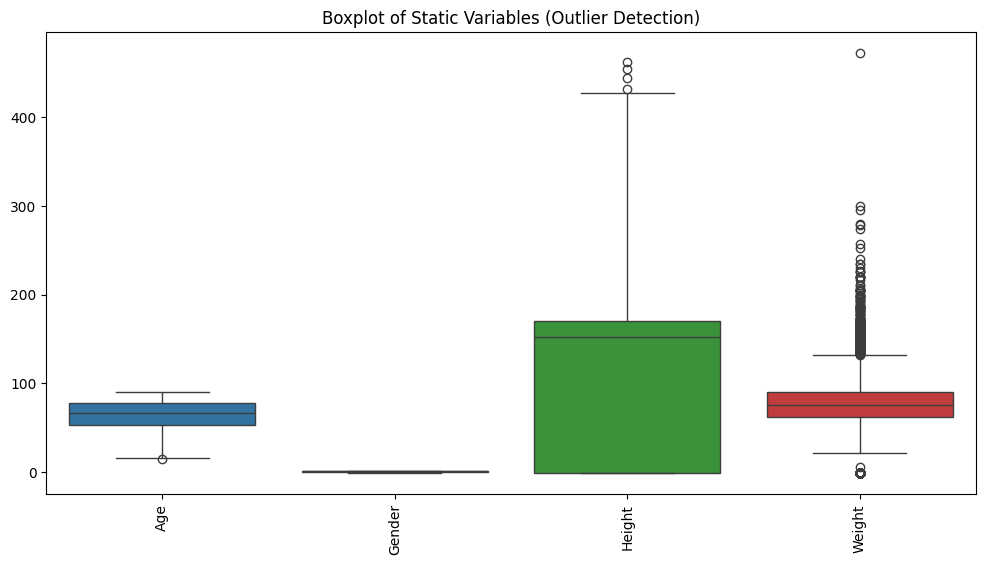

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=static_df.drop(columns=['RecordID', 'In-hospital_death']))
plt.xticks(rotation=90)
plt.title("Boxplot of Static Variables (Outlier Detection)")
plt.show()
